## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


#For accuracy, precision, recall and fscore metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
#import sklearn.ensemble.HistGradientBoostingClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Flatten
from keras.layers import ConvLSTM2D
from keras.preprocessing.sequence import TimeseriesGenerator

#to save model
import pickle
from tensorflow.keras.saving import load_model

## Data Preparation

In [2]:
# Get a list of all CSV files in a directory
csv_files = glob.glob('C:/Users/hwa2zj7/OneDrive - Deere & Co/03_BITS/Dissertation/Dataset/PickerDataSet/*.csv')

In [4]:
# Create an empty dataframe to store the combined data
df = pd.DataFrame()

# Loop through each CSV file and append its contents to the combined dataframe
for csv_file in csv_files:
    single_df = pd.read_csv(csv_file)
    df = pd.concat([df, single_df])

In [3]:
#Training dataset
csv_files = glob.glob('C:/Users/hwa2zj7/OneDrive - Deere & Co/03_BITS/Dissertation/Dataset/TrainingDataSet_2/*.csv')
# Create an empty dataframe to store the combined data
df = pd.DataFrame()
# Loop through each CSV file and append its contents to the combined dataframe
for csv_file in csv_files:
    single_df = pd.read_csv(csv_file)
    df = pd.concat([df, single_df])

In [4]:
#Rename columns
df.rename(columns = {'Time (s)':'Time','OIC.HarvEngageCmds (BitQuadState)':'State1','OIC.HarvEngageCmds2 (BitQuadState)':'State2','ECU.EngineSpeed (rpm)':'Speed1','PTP.WheelBasedVehicleSpeed (kph)':'Speed2','0x5B.EngThrottleState (state)':'State3','JDL.HdrDriveSpeed (rpm)':'Speed3','JDL.ClnrDriveSpeed (rpm)':'Speed4','ECU.EngOpStateFromEcu (state)':'State4','0x5B.ProdFanSpd (rpm)':'Speed5','0x5B.ImplementWorkState (state)':'State5','JDL.LHDrumSpeed (rpm)':'Speed6','JDL.RHDrumSpeed (rpm)':'Speed7','JDL.HdrAvgSpd (rpm)':'Speed8','JDL.CA4_ValidatedMachMode (mode)':'Mode'}, inplace = True)
df.rename(columns = {'JDL.Unit1_Front_Drum_Speed (rpm)':'SpeedA1','JDL.Unit2_Front_Drum_Speed (rpm)':'SpeedA2','JDL.Unit3_Front_Drum_Speed (rpm)':'SpeedA3','JDL.Unit4_Front_Drum_Speed (rpm)':'SpeedA4','JDL.Unit5_Front_Drum_Speed (rpm)':'SpeedA5','JDL.Unit6_Front_Drum_Speed (rpm)':'SpeedA6'}, inplace = True)
df.rename(columns = {'JDL.Unit1_Rear_Drum_Speed (rpm)':'SpeedB1','JDL.Unit2_Rear_Drum_Speed (rpm)':'SpeedB2','JDL.Unit3_Rear_Drum_Speed (rpm)':'SpeedB3','JDL.Unit4_Rear_Drum_Speed (rpm)':'SpeedB4','JDL.Unit5_Rear_Drum_Speed (rpm)':'SpeedB5','JDL.Unit6_Rear_Drum_Speed (rpm)':'SpeedB6'}, inplace=True)
df.rename(columns = {'SV2.Unit1_Front_Plug (Bool)':'BoolStateA1','SV2.Unit1_Rear_Plug (Bool)':'BoolStateB1','SV2.Unit1_Doffer_Plug (Bool)':'BoolStateC1',
                     'SV2.Unit2_Front_Plug (Bool)':'BoolStateA2','SV2.Unit2_Rear_Plug (Bool)':'BoolStateB2','SV2.Unit2_Doffer_Plug (Bool)':'BoolStateC2',
                     'SV2.Unit3_Front_Plug (Bool)':'BoolStateA3','SV2.Unit3_Rear_Plug (Bool)':'BoolStateB3','SV2.Unit3_Doffer_Plug (Bool)':'BoolStateC3',
                     'SV2.Unit4_Front_Plug (Bool)':'BoolStateA4','SV2.Unit4_Rear_Plug (Bool)':'BoolStateB4','SV2.Unit4_Doffer_Plug (Bool)':'BoolStateC4',
                     'SV2.Unit5_Front_Plug (Bool)':'BoolStateA5','SV2.Unit5_Rear_Plug (Bool)':'BoolStateB5','SV2.Unit5_Doffer_Plug (Bool)':'BoolStateC5',
                     'SV2.Unit6_Front_Plug (Bool)':'BoolStateA6','SV2.Unit6_Rear_Plug (Bool)':'BoolStateB6','SV2.Unit6_Doffer_Plug (Bool)':'BoolStateC6'}, inplace=True)

## Exploratory Data Analysis

In [4]:
# Print the combined dataframe
print(df.columns)
print(df)

Index(['Time', 'State1', 'State2', 'Speed1', 'State4', 'Speed2', 'State3',
       'Speed5', 'State5', 'Speed6', 'Speed7', 'Speed3', 'Speed4', 'Speed8',
       'SpeedA1', 'SpeedA2', 'SpeedA3', 'SpeedA4', 'SpeedA5', 'SpeedA6',
       'SpeedB1', 'SpeedB2', 'SpeedB3', 'SpeedB4', 'SpeedB5', 'SpeedB6',
       'Mode', 'BoolStateA1', 'BoolStateB1', 'BoolStateC1', 'BoolStateA2',
       'BoolStateB2', 'BoolStateC2', 'BoolStateA3', 'BoolStateB3',
       'BoolStateC3', 'BoolStateA4', 'BoolStateB4', 'BoolStateC4',
       'BoolStateA5', 'BoolStateB5', 'BoolStateC5', 'BoolStateA6',
       'BoolStateB6', 'BoolStateC6'],
      dtype='object')
            Time  State1  State2   Speed1  State4    Speed2  State3  Speed5  \
0       1923.136       1       1  1901.75       2  7.421875       1    4240   
1       1923.136       1       1  1901.75       2  7.421875       1    4240   
2       1923.136       1       1   904.25      11  7.421875       1    4240   
3       1923.136       1       1   904.25      11 

In [9]:
# Drop unnecessary columns
df=df.drop(['Time'],axis=1)

In [13]:
#Head data
df.head()

,State1,State2,Speed1,State4,Speed2,State3,Speed5,State5,Speed6,Speed7,...,BoolStateC3,BoolStateA4,BoolStateB4,BoolStateC4,BoolStateA5,BoolStateB5,BoolStateC5,BoolStateA6,BoolStateB6,BoolStateC6
0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,899.5,2.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,899.5,2.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,899.5,2.0,0.0,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Tail data
df.tail()

,State1,State2,Speed1,State4,Speed2,State3,Speed5,State5,Speed6,Speed7,...,BoolStateC3,BoolStateA4,BoolStateB4,BoolStateC4,BoolStateA5,BoolStateB5,BoolStateC5,BoolStateA6,BoolStateB6,BoolStateC6
89373,1.0,1.0,1903.00,4.0,5.019531,3.0,4260.0,3.0,122.0,121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89374,1.0,1.0,1898.75,3.0,5.019531,3.0,4260.0,3.0,122.0,121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89375,1.0,1.0,1897.00,3.0,5.019531,3.0,4260.0,3.0,122.0,121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89376,1.0,1.0,1896.00,5.0,5.019531,3.0,4260.0,3.0,122.0,121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89377,1.0,1.0,1896.00,5.0,5.019531,3.0,4260.0,3.0,122.0,121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9002104 entries, 0 to 89377
Data columns (total 44 columns):
 #   Column       Dtype  
---  ------       -----  
 0   State1       float64
 1   State2       float64
 2   Speed1       float64
 3   State4       float64
 4   Speed2       float64
 5   State3       float64
 6   Speed5       float64
 7   State5       float64
 8   Speed6       float64
 9   Speed7       float64
 10  Speed3       float64
 11  Speed4       float64
 12  Speed8       float64
 13  SpeedA1      float64
 14  SpeedA2      float64
 15  SpeedA3      float64
 16  SpeedA4      float64
 17  SpeedA5      float64
 18  SpeedA6      float64
 19  SpeedB1      float64
 20  SpeedB2      float64
 21  SpeedB3      float64
 22  SpeedB4      float64
 23  SpeedB5      float64
 24  SpeedB6      float64
 25  Mode         float64
 26  BoolStateA1  float64
 27  BoolStateB1  float64
 28  BoolStateC1  float64
 29  BoolStateA2  float64
 30  BoolStateB2  float64
 31  BoolStateC2  float64
 32  

In [26]:
#Data Description
df.describe()

,State1,State2,Speed1,State4,Speed2,State3,Speed5,State5,Speed6,Speed7,...,BoolStateC3,BoolStateA4,BoolStateB4,BoolStateC4,BoolStateA5,BoolStateB5,BoolStateC5,BoolStateA6,BoolStateB6,BoolStateC6
count,9.002079e+06,9.002079e+06,9.002102e+06,9.002102e+06,9.002104e+06,9.002055e+06,9.002060e+06,9002060.0,9.002100e+06,9.002100e+06,...,8706481.0,8706481.0,8706481.0,8706481.0,8706481.0,8706481.0,8706481.0,8706481.0,8706481.0,8706481.0
mean,7.859066e-01,7.755245e-01,1.507200e+03,8.244121e+00,4.993341e+00,2.374402e+00,2.336089e+03,3.0,9.906757e+02,9.628445e+02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.747756e+00,1.749423e+00,5.617607e+02,5.029718e+00,7.168237e+00,1.009813e+00,2.047597e+03,0.0,7.774608e+03,7.777836e+03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.0,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000e+00,0.000000e+00,9.002500e+02,3.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.0,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.000000e+00,1.000000e+00,1.896000e+03,1.000000e+01,3.640625e+00,3.000000e+00,4.130000e+03,3.0,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.000000e+00,1.000000e+00,1.900750e+03,1.300000e+01,7.417969e+00,3.000000e+00,4.240000e+03,3.0,1.400000e+02,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.500000e+01,1.500000e+01,2.088750e+03,1.500000e+01,3.323438e+01,4.000000e+00,4.540000e+03,3.0,6.553500e+04,6.553500e+04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#Null values in the data
df.isnull().sum()

State1              25
State2              25
Speed1               2
State4               2
Speed2               0
State3              49
Speed5              44
State5              44
Speed6               4
Speed7               4
Speed3               4
Speed4               4
Speed8         4749236
SpeedA1        4749092
SpeedA2        4749092
SpeedA3        4749092
SpeedA4        4749092
SpeedA5        4749092
SpeedA6        4749092
SpeedB1        4749091
SpeedB2        4749091
SpeedB3        4749091
SpeedB4        4749091
SpeedB5        4749091
SpeedB6        4749091
Mode           4749543
BoolStateA1     295623
BoolStateB1     295623
BoolStateC1     295623
BoolStateA2     295623
BoolStateB2     295623
BoolStateC2     295623
BoolStateA3     295623
BoolStateB3     295623
BoolStateC3     295623
BoolStateA4     295623
BoolStateB4     295623
BoolStateC4     295623
BoolStateA5     295623
BoolStateB5     295623
BoolStateC5     295623
BoolStateA6     295623
BoolStateB6     295623
BoolStateC6

In [22]:
# Check unique data
#print(df.EngThrState.unique())
#print(df.EngThrState.nunique())

In [27]:
# Separate Numerical and categorical variables
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index([], dtype='object')
Numerical Variables:
['State1', 'State2', 'Speed1', 'State4', 'Speed2', 'State3', 'Speed5', 'State5', 'Speed6', 'Speed7', 'Speed3', 'Speed4', 'Speed8', 'SpeedA1', 'SpeedA2', 'SpeedA3', 'SpeedA4', 'SpeedA5', 'SpeedA6', 'SpeedB1', 'SpeedB2', 'SpeedB3', 'SpeedB4', 'SpeedB5', 'SpeedB6', 'Mode', 'BoolStateA1', 'BoolStateB1', 'BoolStateC1', 'BoolStateA2', 'BoolStateB2', 'BoolStateC2', 'BoolStateA3', 'BoolStateB3', 'BoolStateC3', 'BoolStateA4', 'BoolStateB4', 'BoolStateC4', 'BoolStateA5', 'BoolStateB5', 'BoolStateC5', 'BoolStateA6', 'BoolStateB6', 'BoolStateC6']


State1
Skew : 7.08


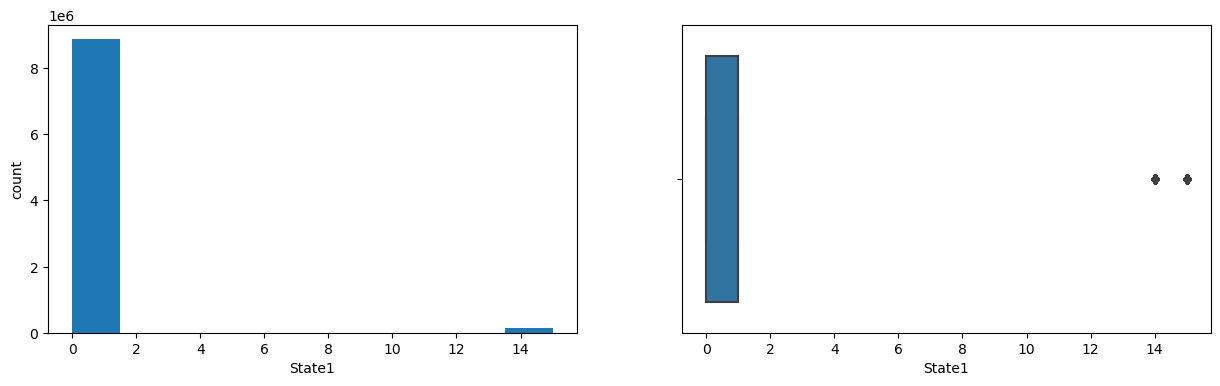

State2
Skew : 7.08


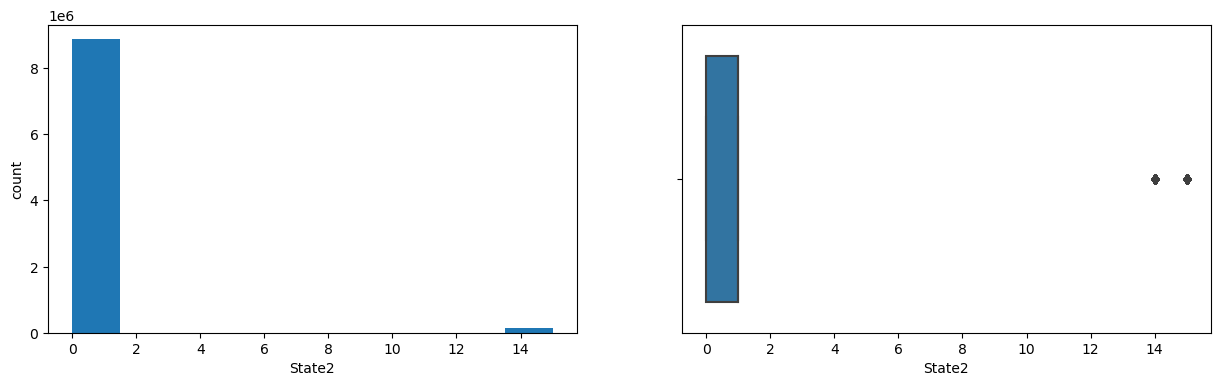

Speed1
Skew : -1.12


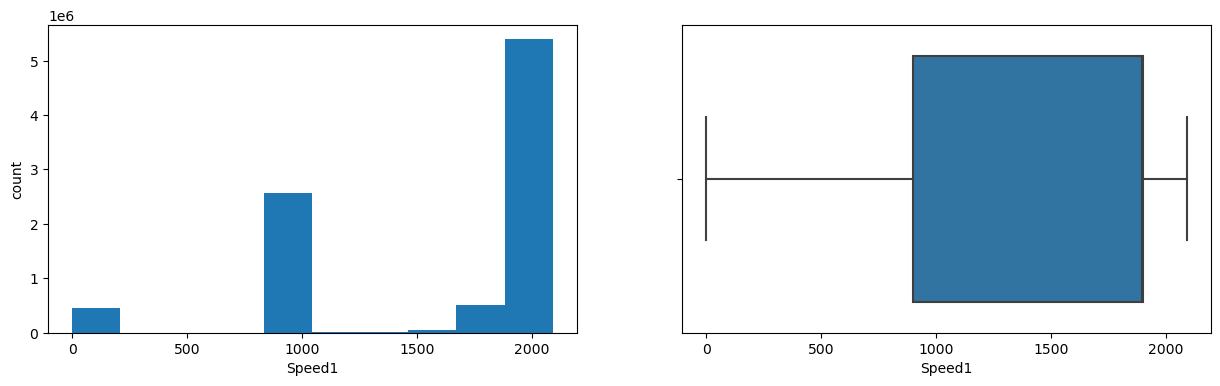

State4
Skew : -0.32


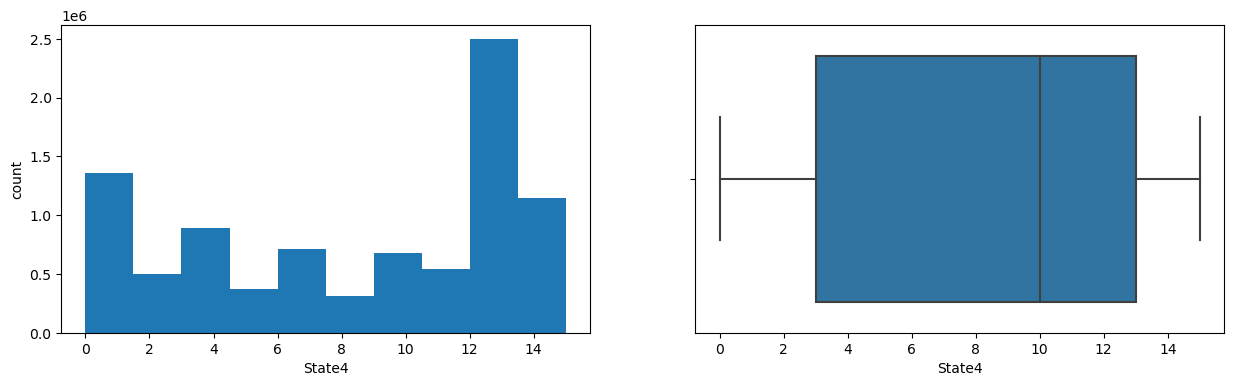

Speed2
Skew : 2.48


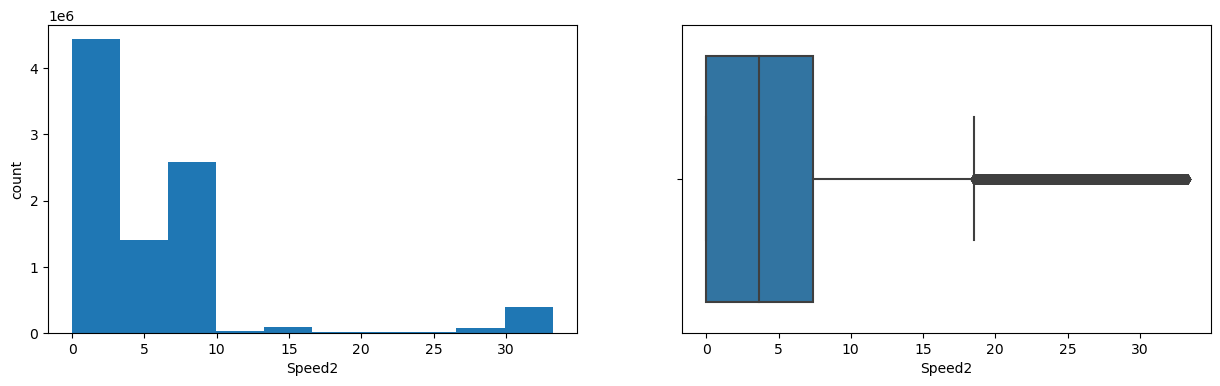

State3
Skew : -0.48


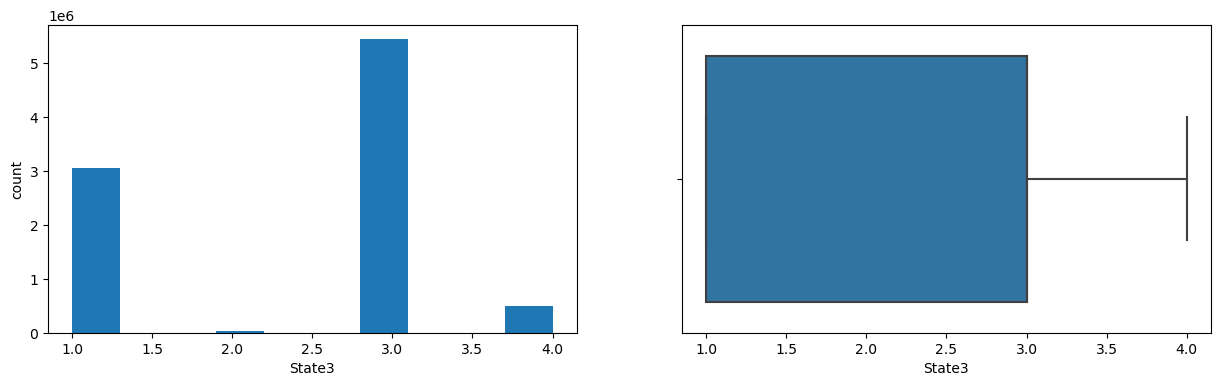

Speed5
Skew : -0.2


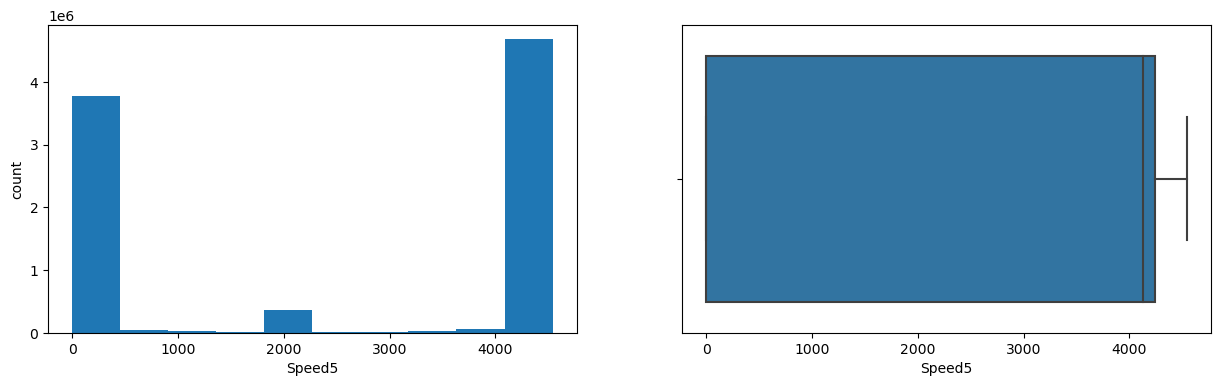

State5
Skew : 0


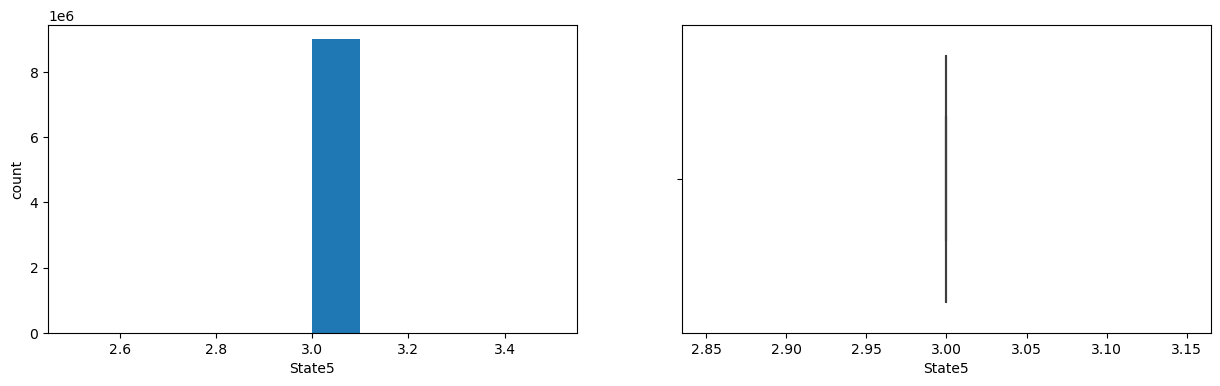

Speed6
Skew : 8.18


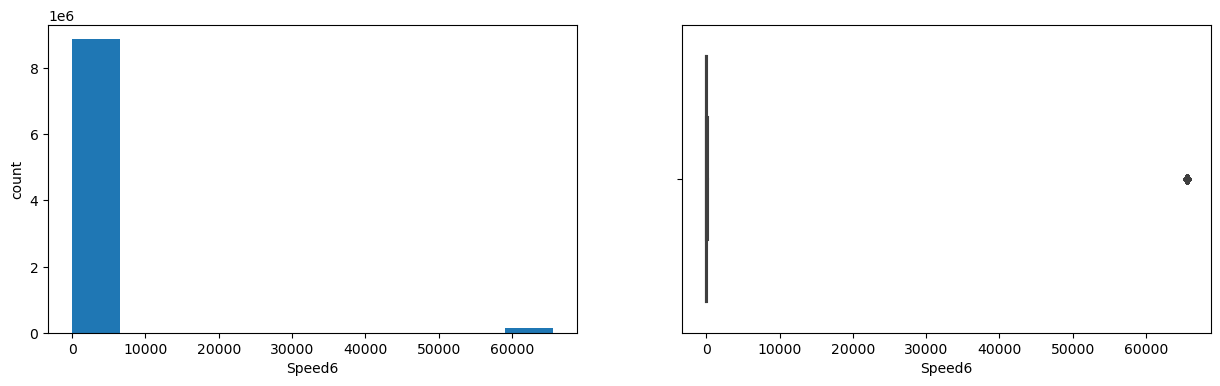

Speed7
Skew : 8.18


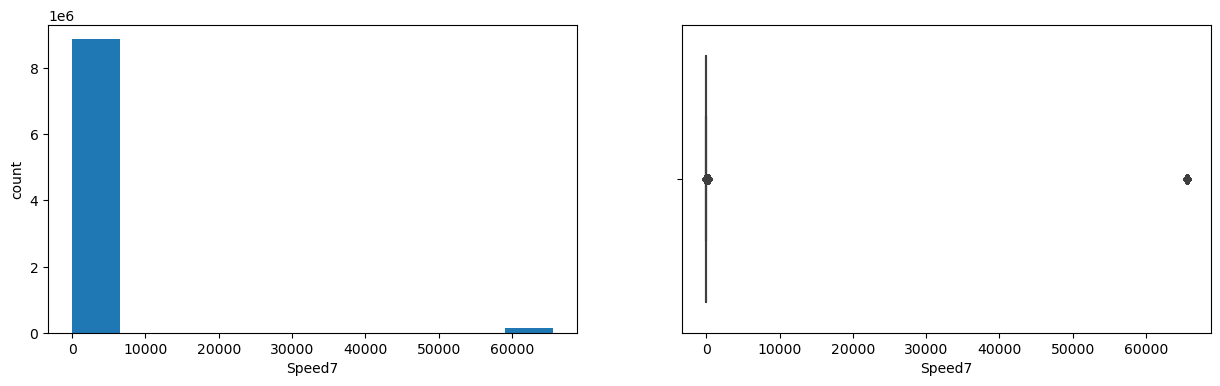

Speed3
Skew : 0.49


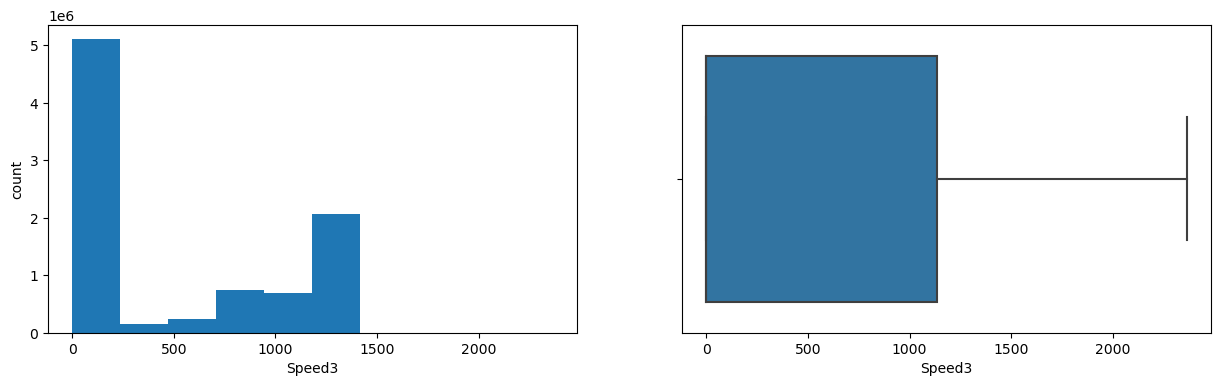

Speed4
Skew : 1.43


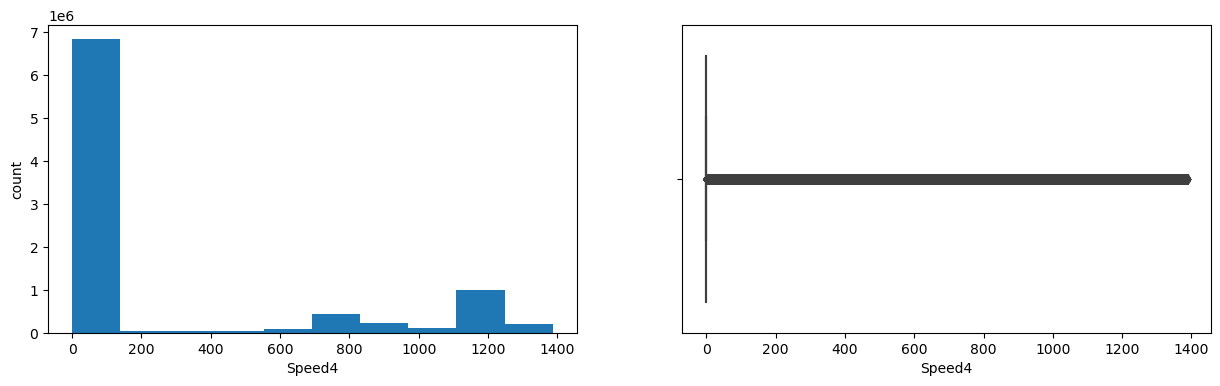

Speed8
Skew : 0.19


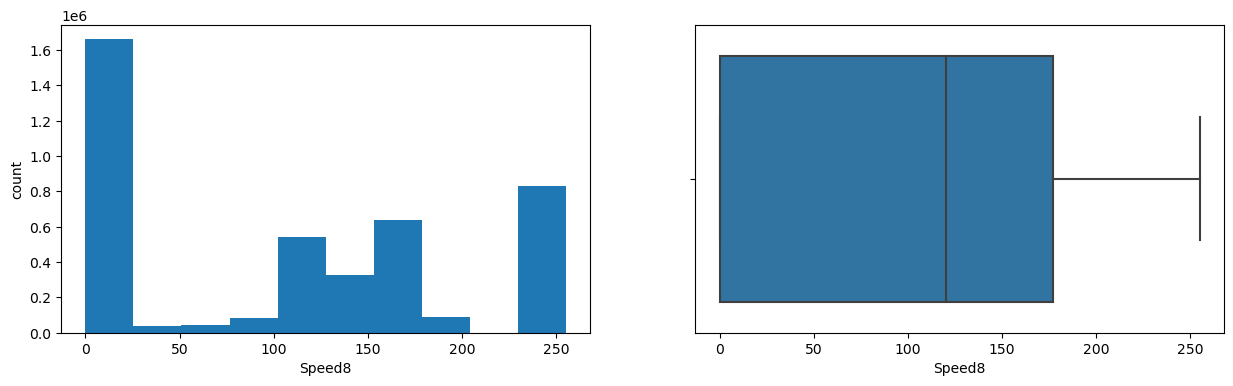

SpeedA1
Skew : 0.12


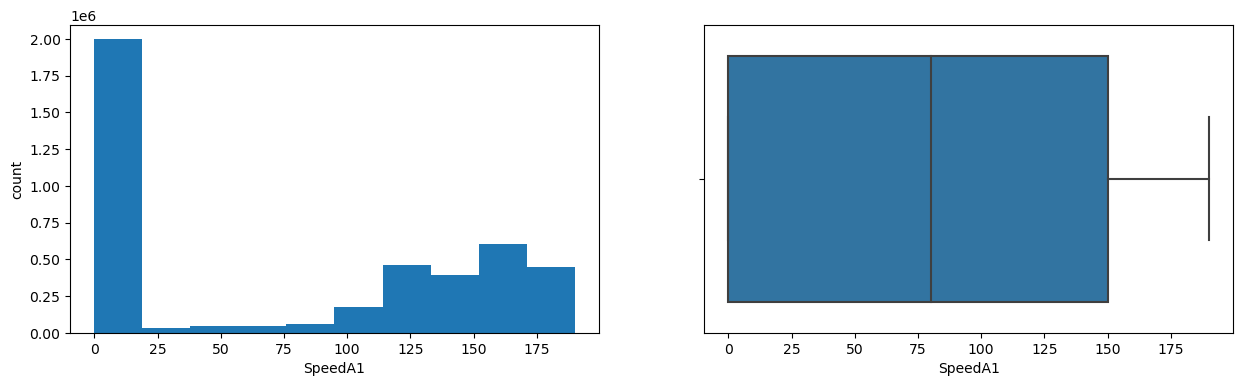

SpeedA2
Skew : 6.55


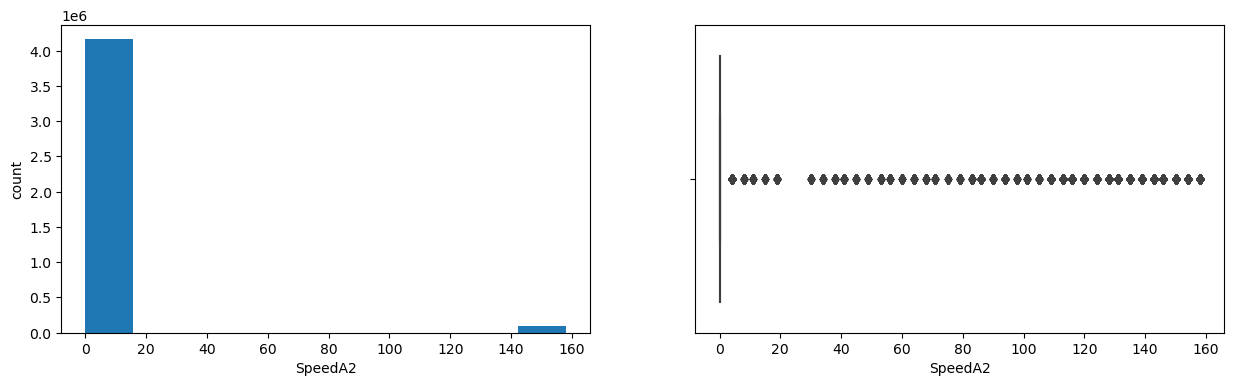

SpeedA3
Skew : 0.12


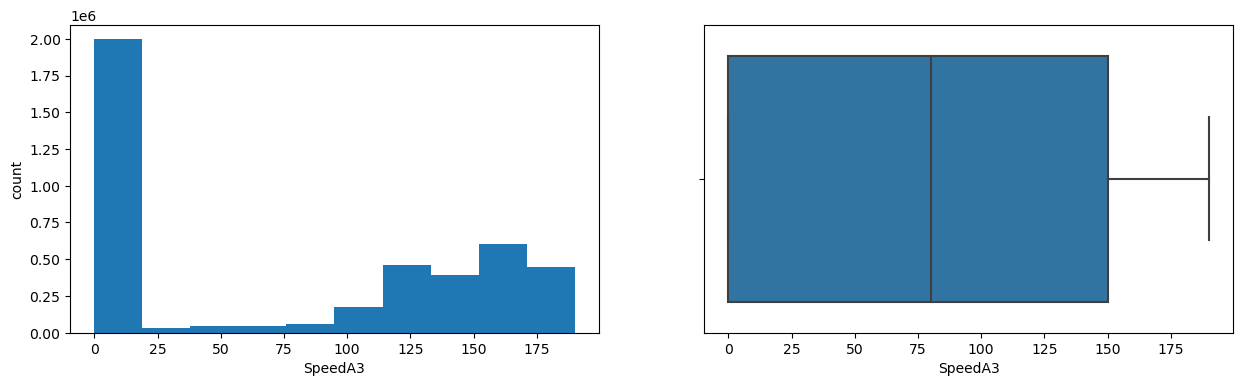

SpeedA4
Skew : 0.21


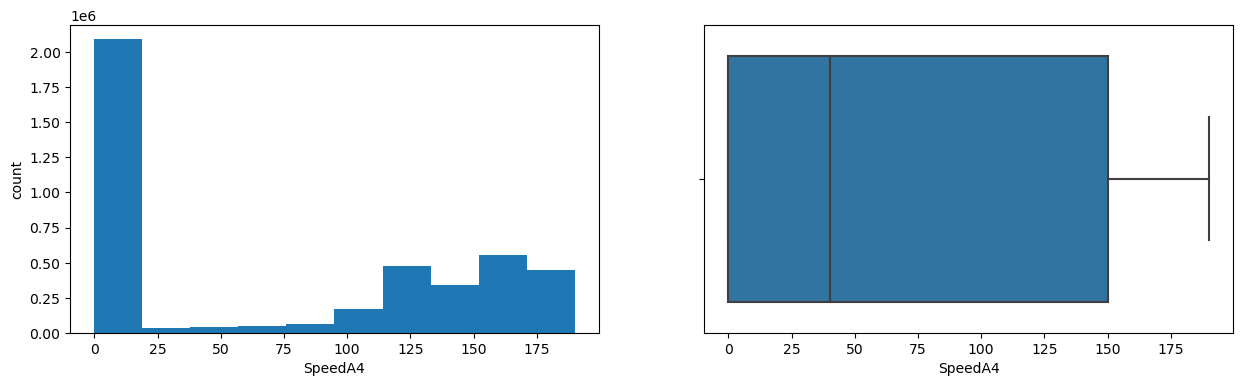

SpeedA5
Skew : 0


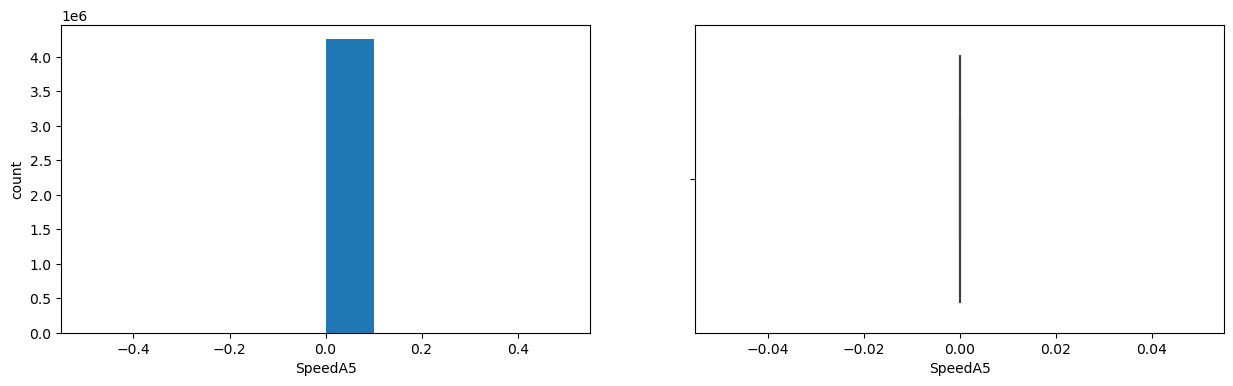

SpeedA6
Skew : 0.21


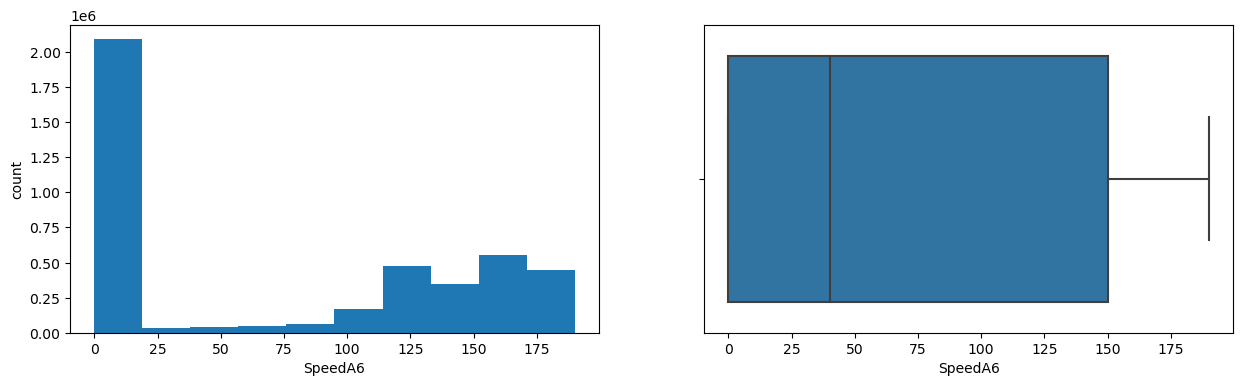

SpeedB1
Skew : 0.16


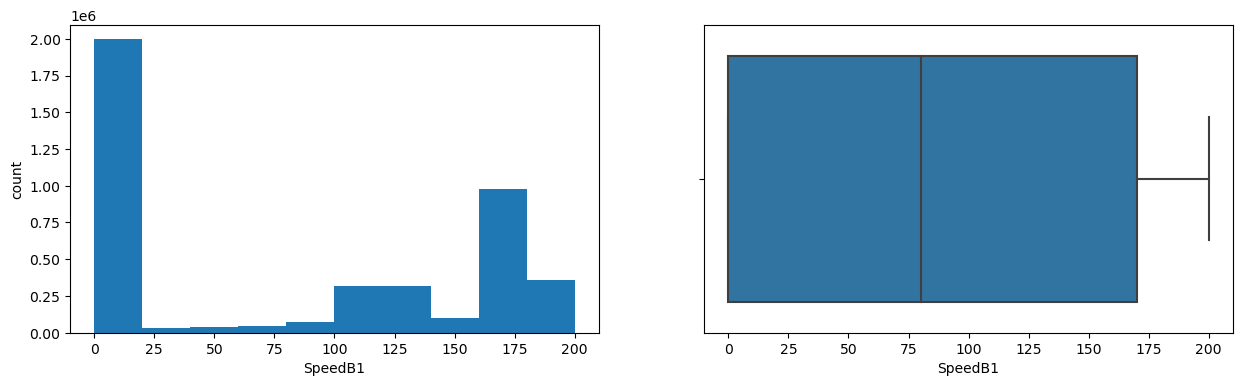

SpeedB2
Skew : 6.55


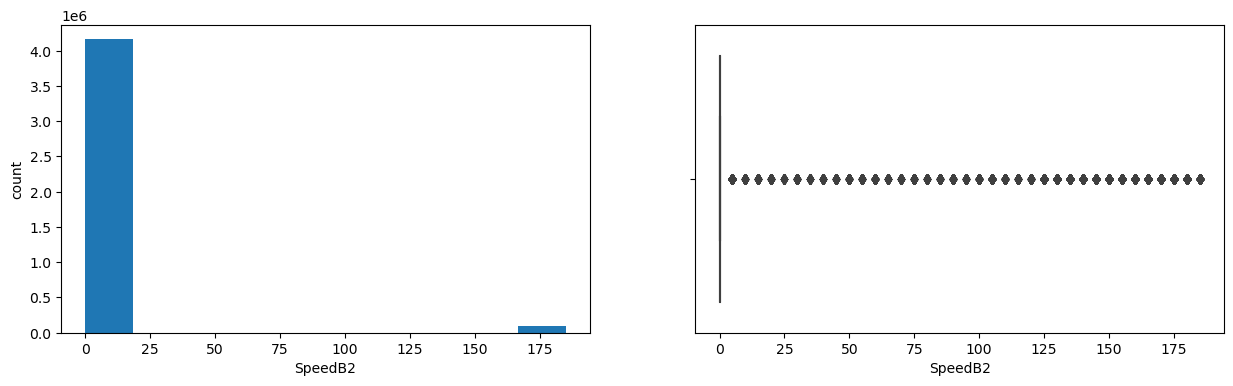

SpeedB3
Skew : 0.16


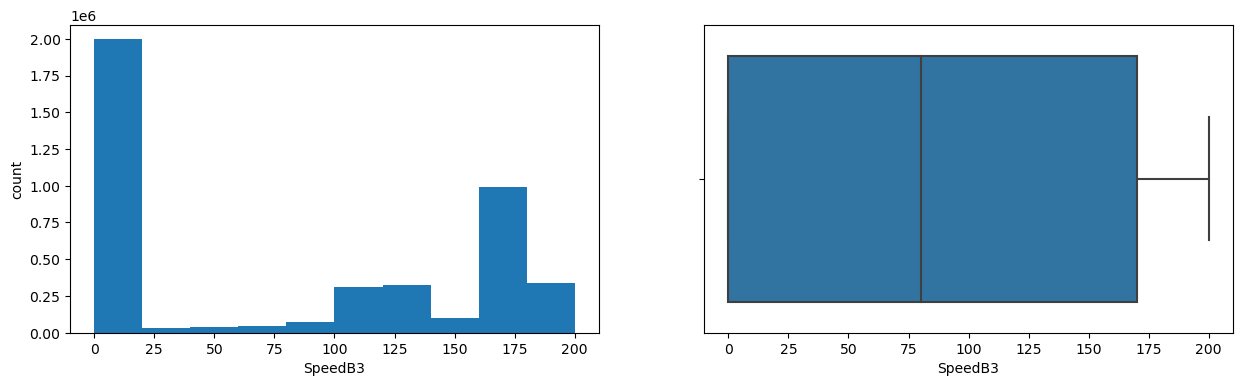

SpeedB4
Skew : 0.25


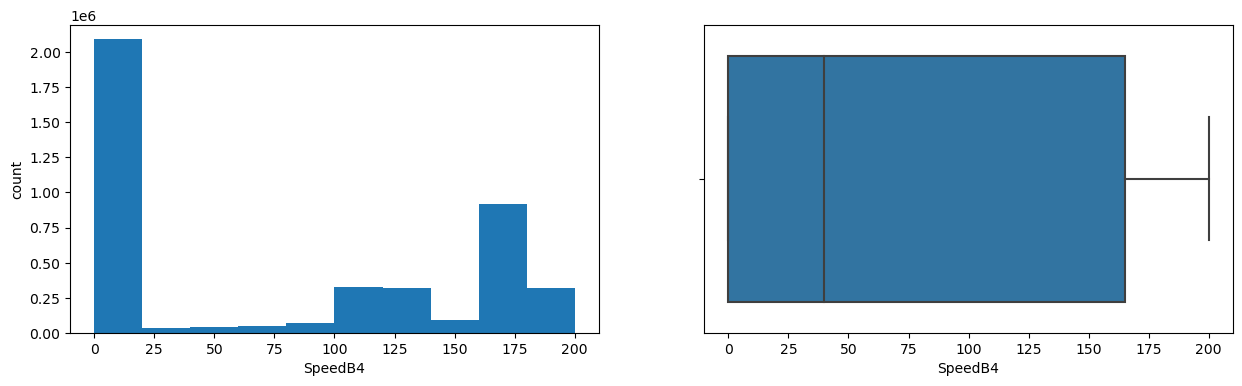

SpeedB5
Skew : 0


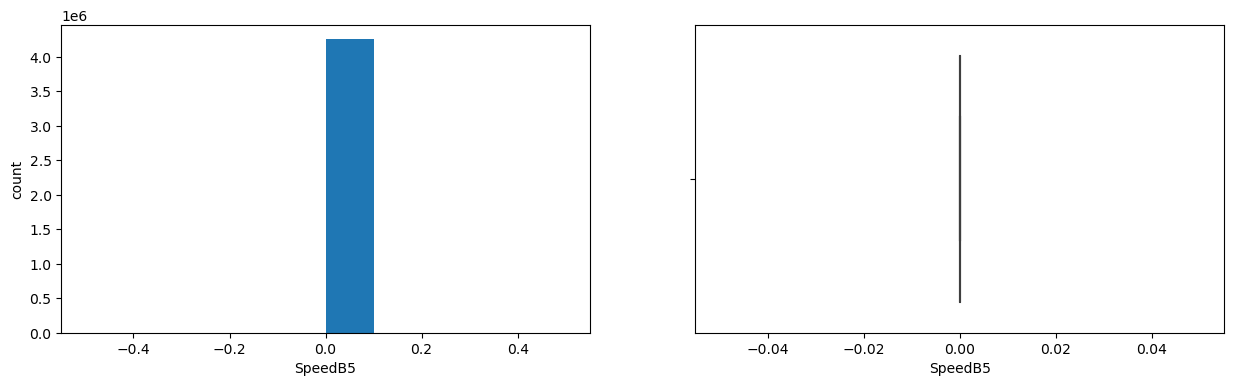

SpeedB6
Skew : 0.24


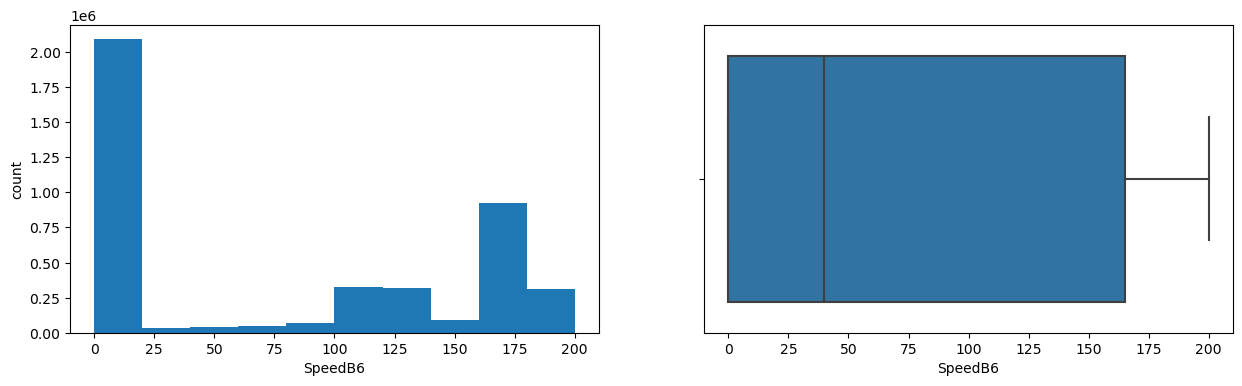

Mode
Skew : 0


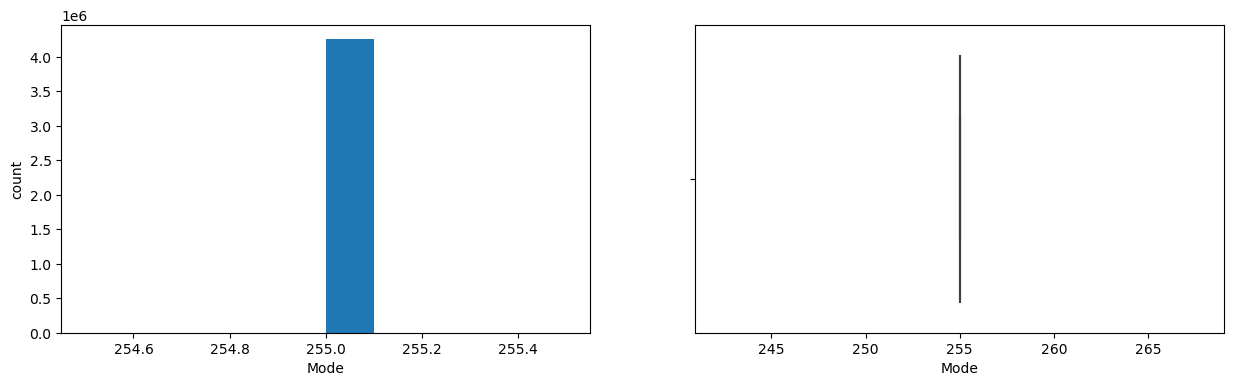

BoolStateA1
Skew : 13.3


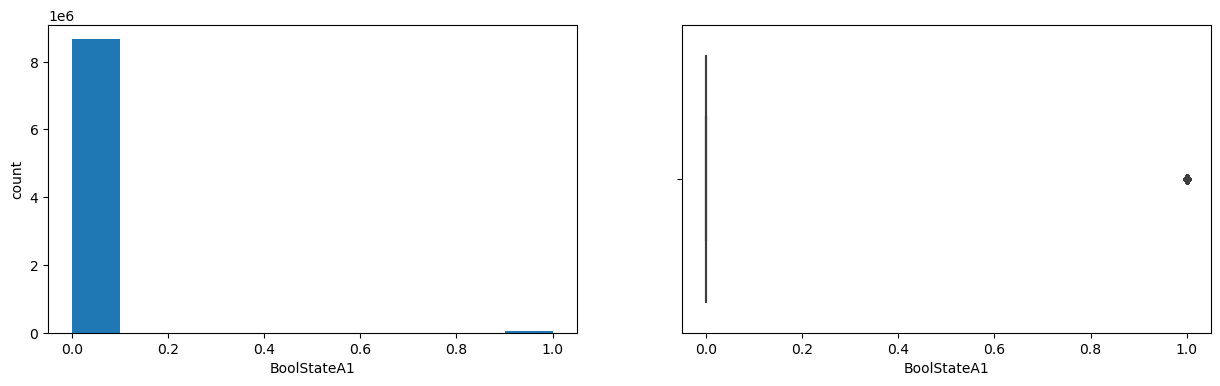

BoolStateB1
Skew : 12.94


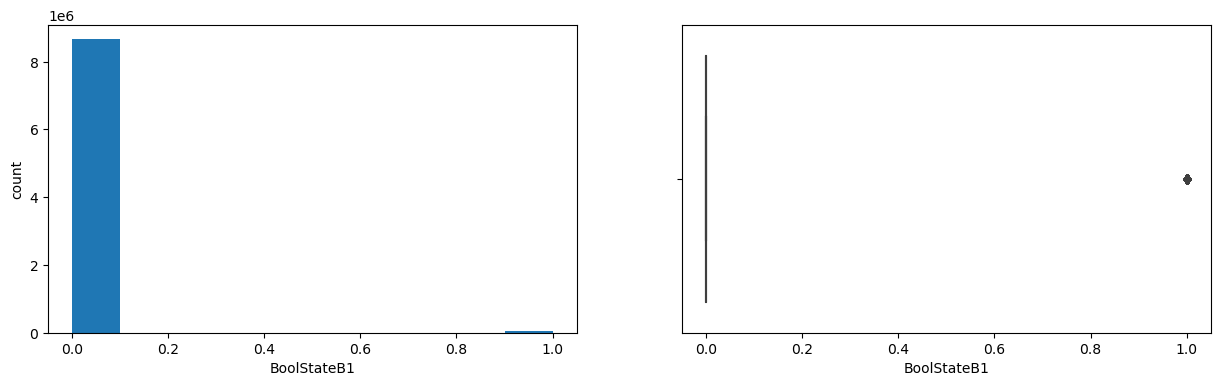

BoolStateC1
Skew : 0


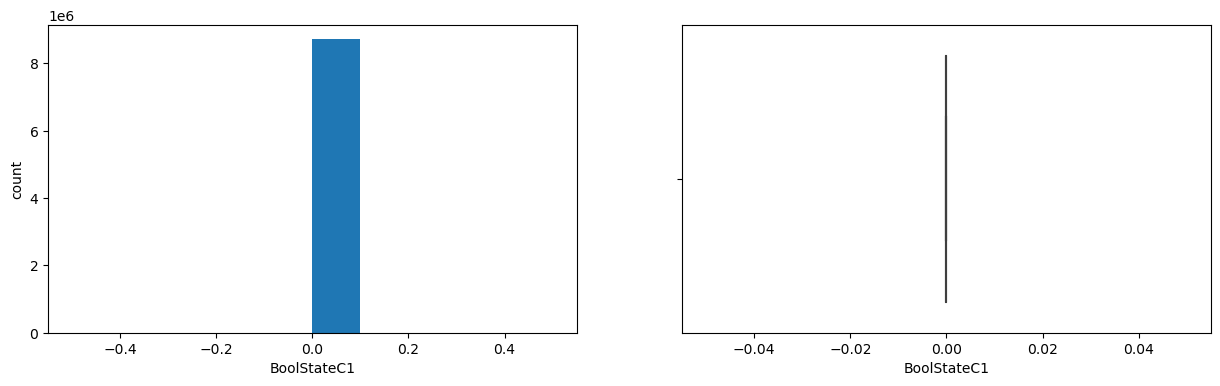

BoolStateA2
Skew : 47.66


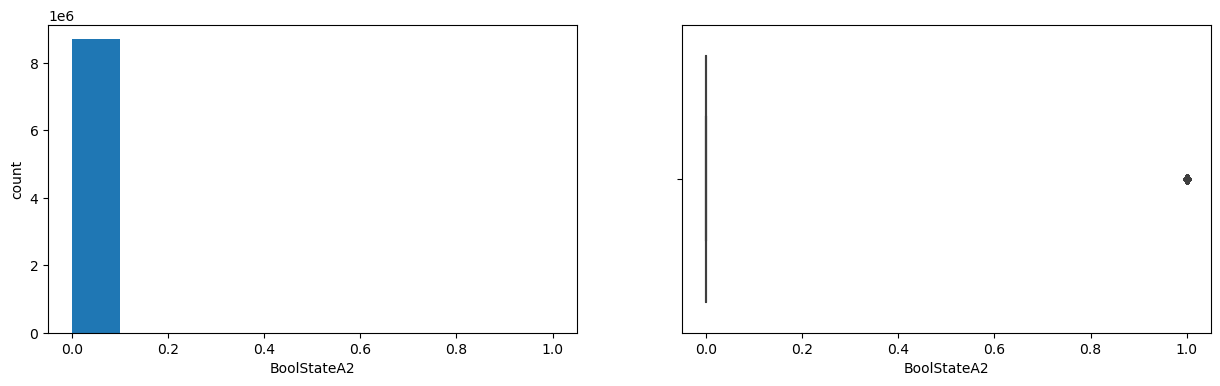

BoolStateB2
Skew : 46.83


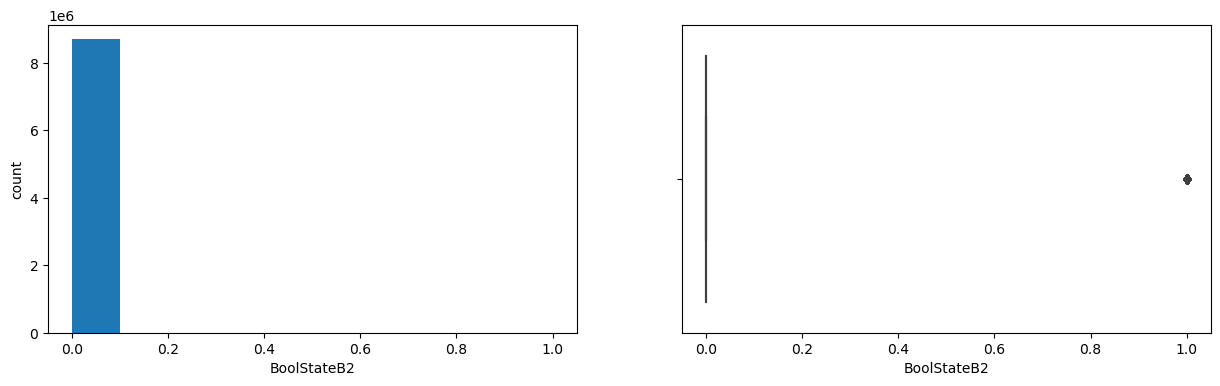

BoolStateC2
Skew : 47.66


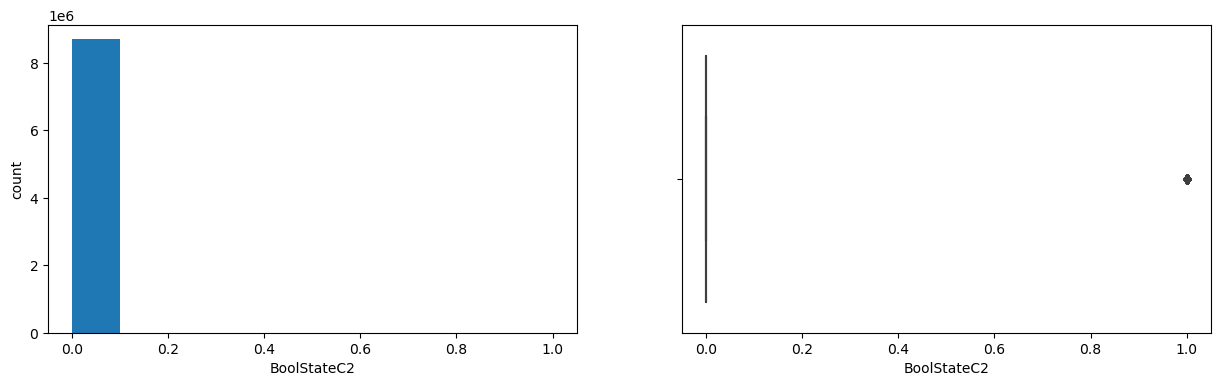

BoolStateA3
Skew : 177.6


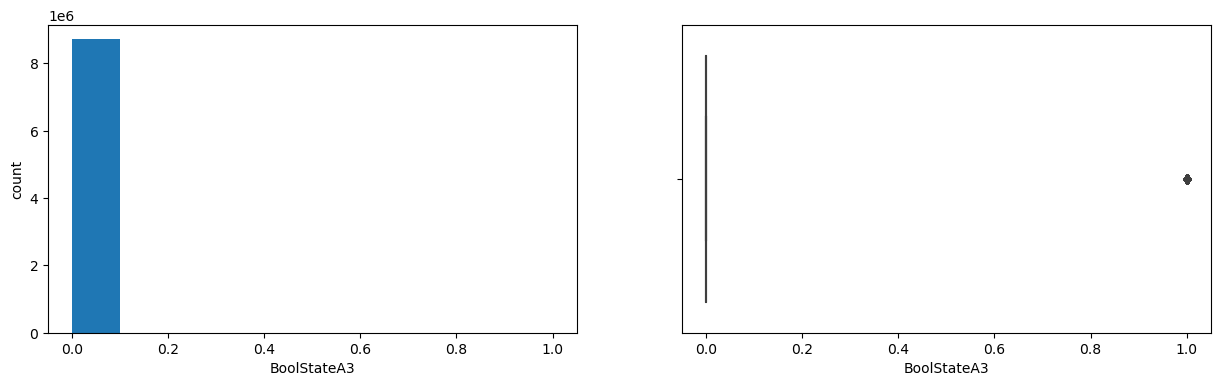

BoolStateB3
Skew : 16.51


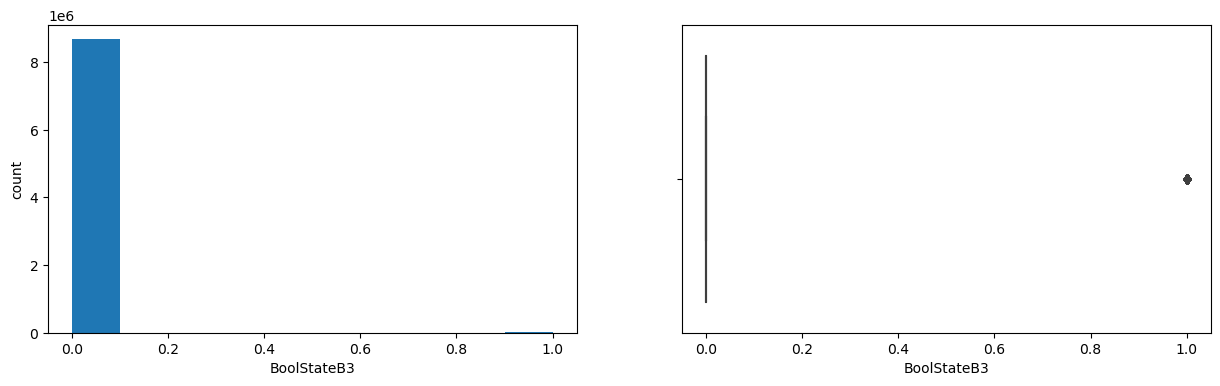

BoolStateC3
Skew : 0


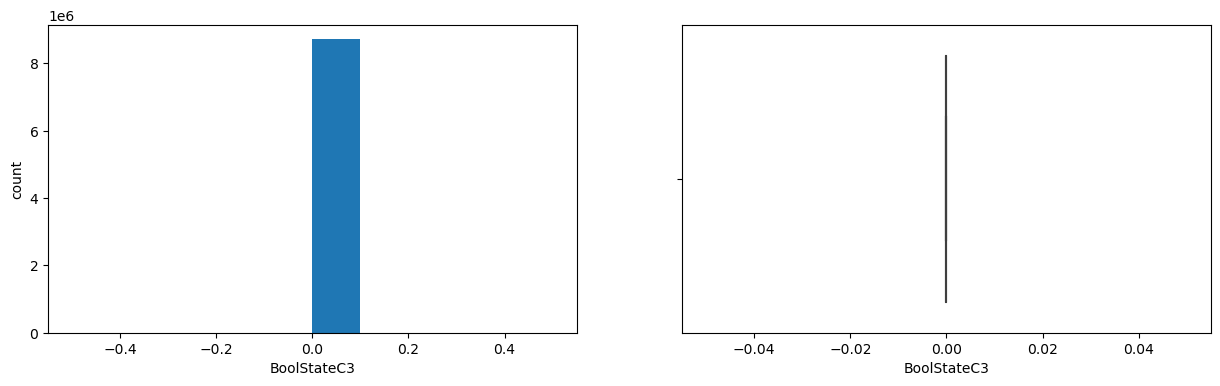

BoolStateA4
Skew : 0


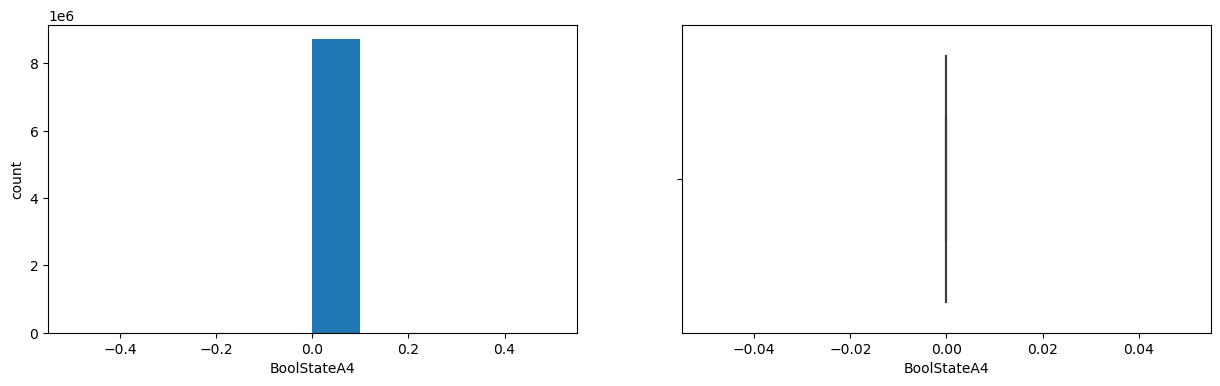

BoolStateB4
Skew : 0


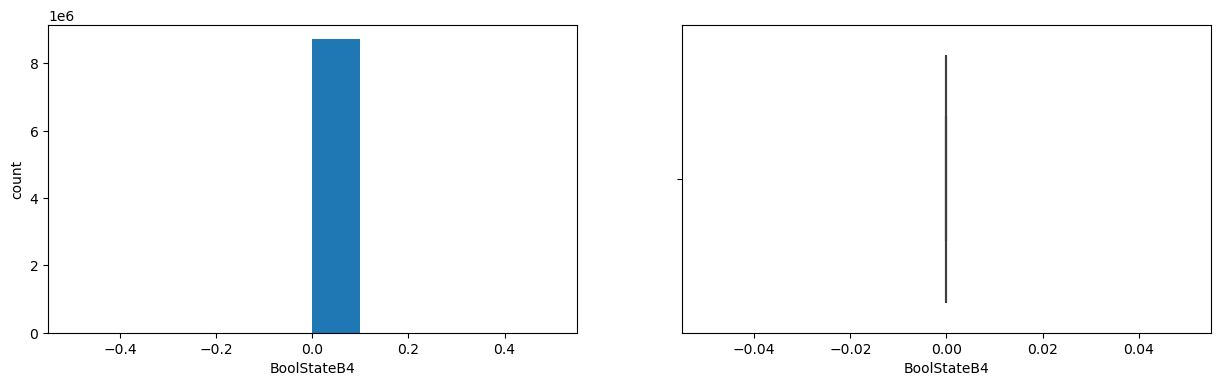

BoolStateC4
Skew : 0


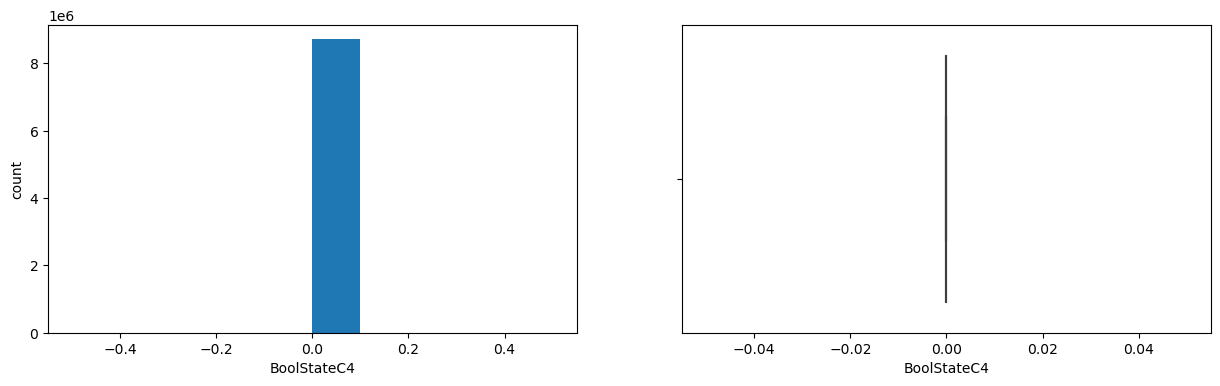

BoolStateA5
Skew : 0


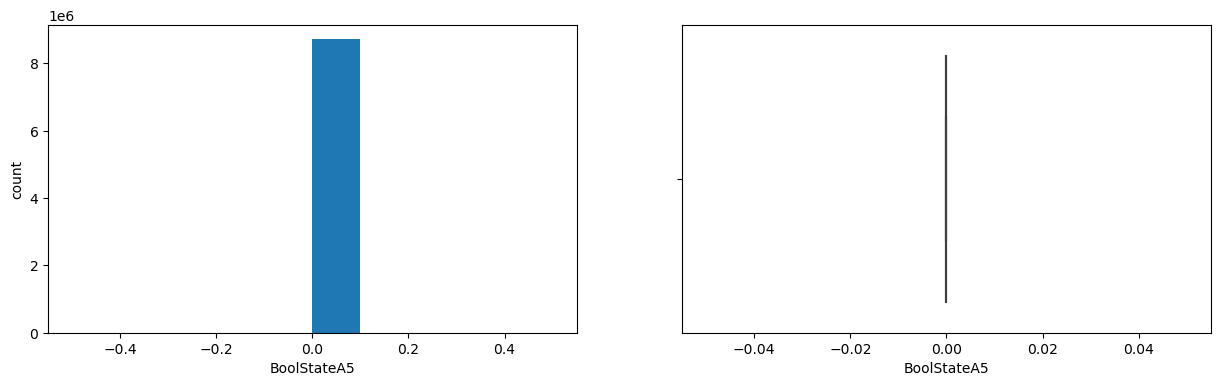

BoolStateB5
Skew : 0


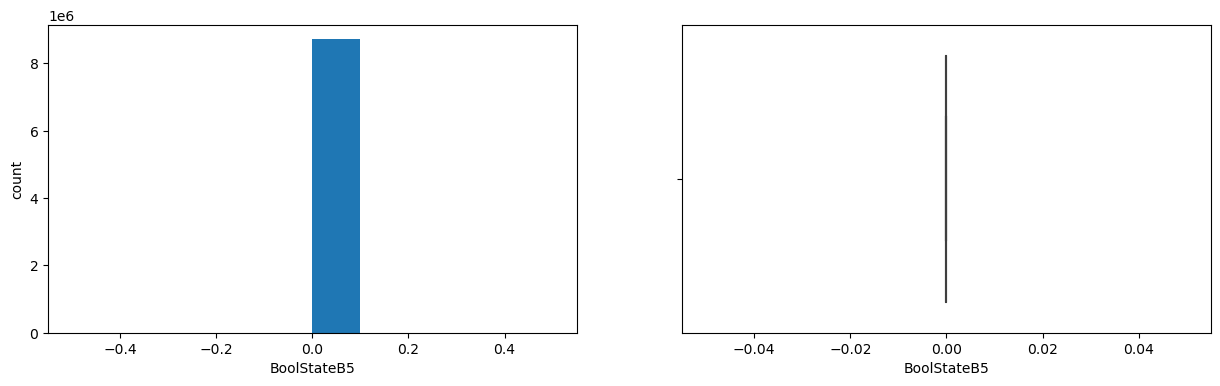

BoolStateC5
Skew : 0


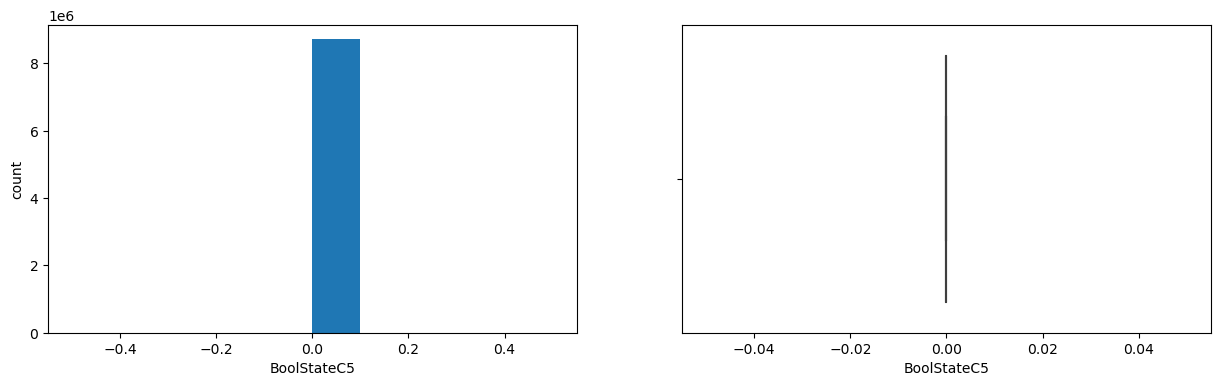

BoolStateA6
Skew : 0


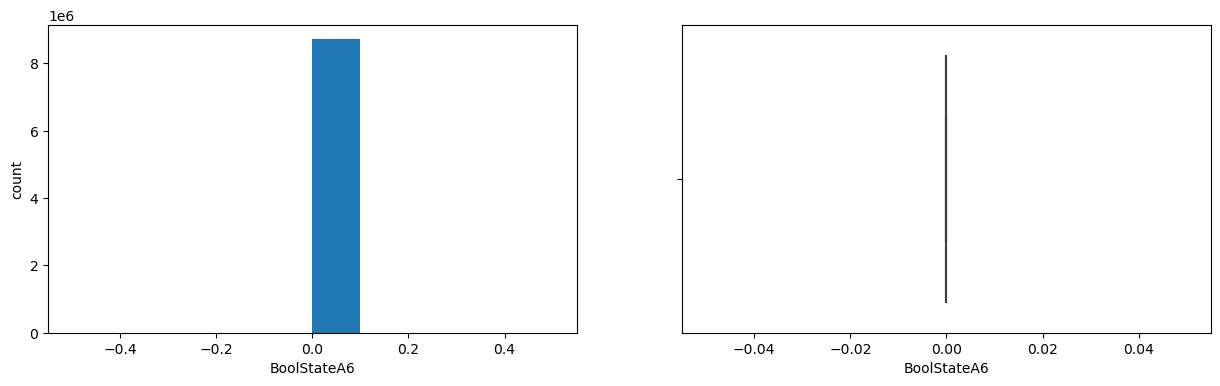

BoolStateB6
Skew : 0


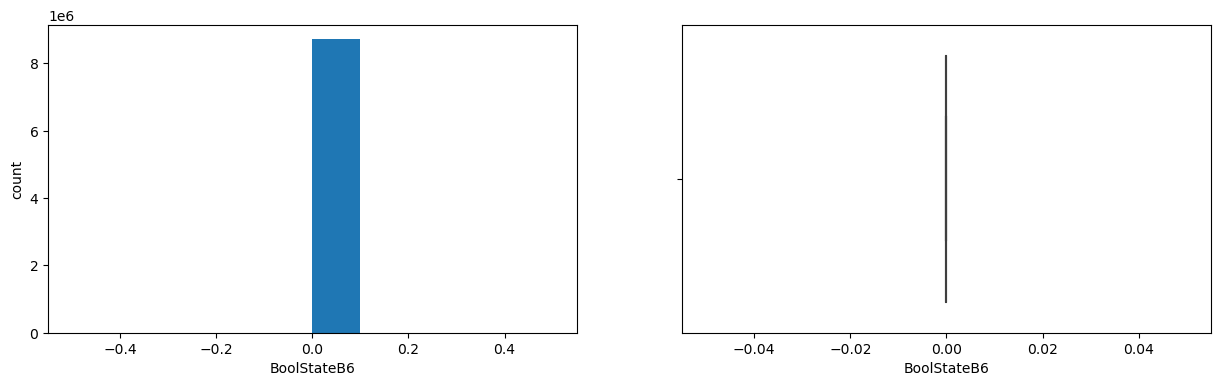

BoolStateC6
Skew : 0


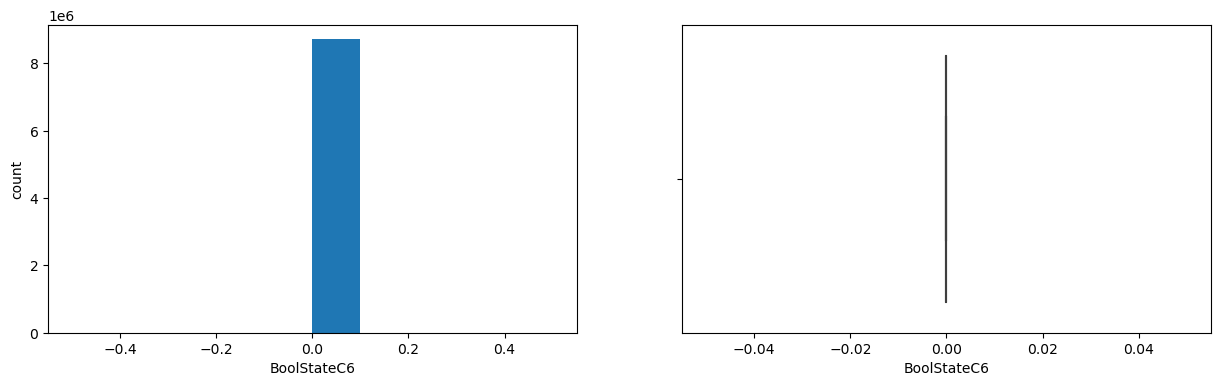

In [32]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.xlabel(col)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()


In [16]:
# pair plot has been used to show the relationship between two Categorical variables
# plt.figure(figsize=(13,17))
# sns.pairplot(data=df.drop(['Time (s)','ClnrDriveSpeed'],axis=1))
# plt.show()

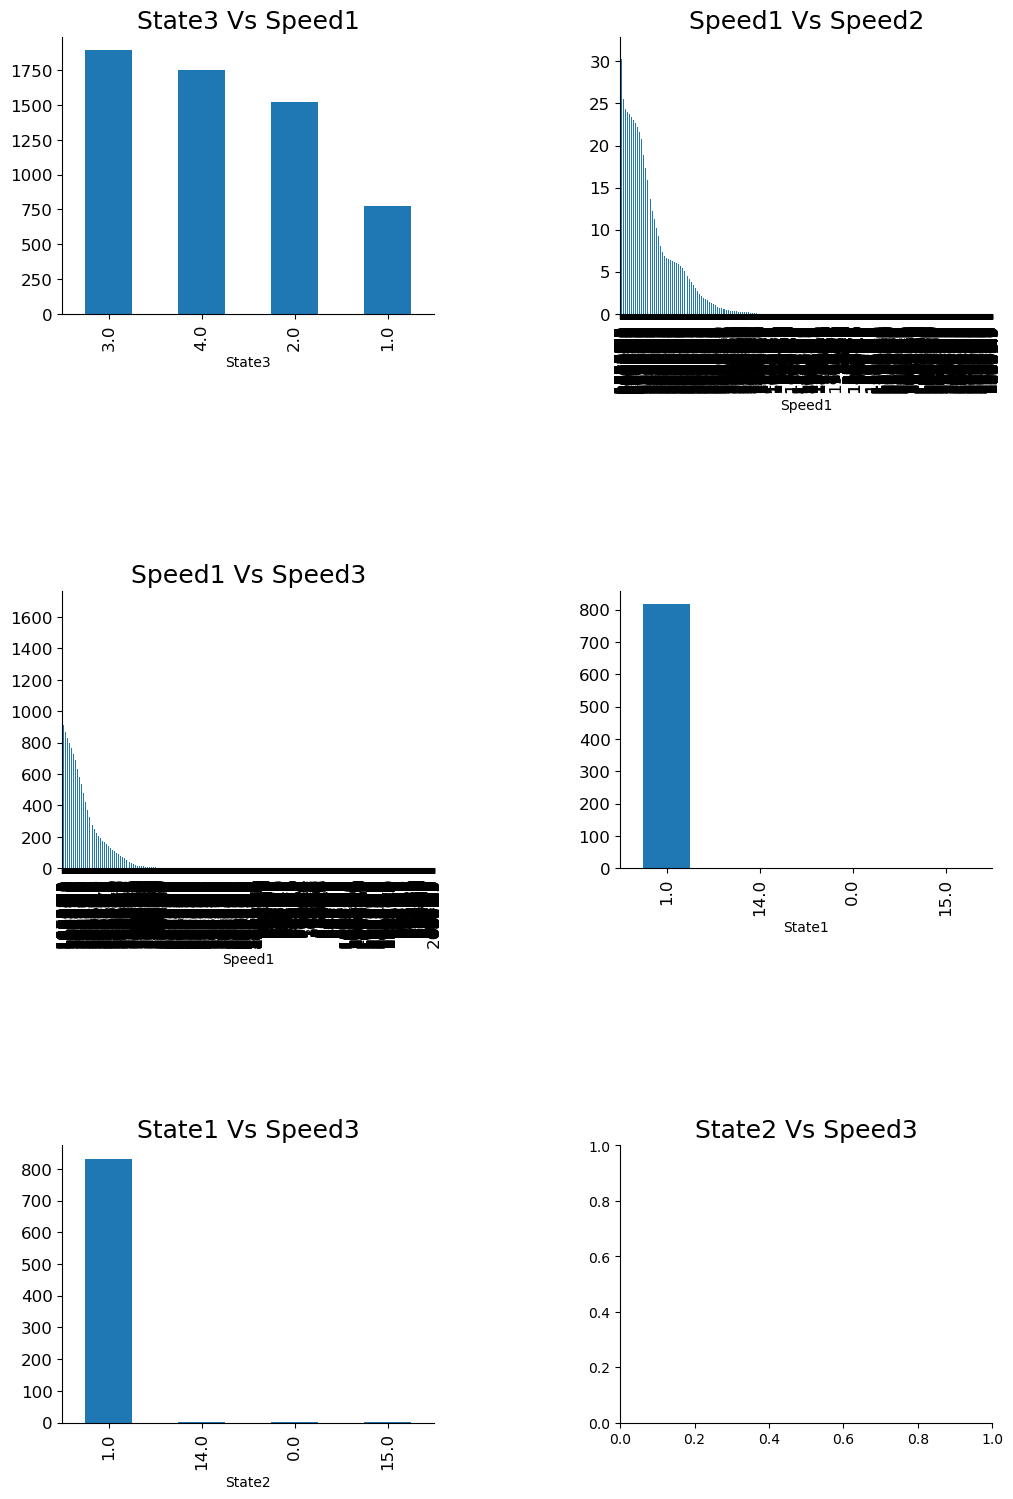

In [30]:
fig, axarr = plt.subplots(3, 2, figsize=(12, 18))
df.groupby('State3')['Speed1'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("State3 Vs Speed1", fontsize=18)
df.groupby('Speed1')['Speed2'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Speed1 Vs Speed2", fontsize=18)
df.groupby('Speed1')['Speed3'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Speed1 Vs Speed3", fontsize=18)
df.groupby('State1')['Speed3'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[2][0].set_title("State1 Vs Speed3", fontsize=18)
df.groupby('State2')['Speed3'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][1].set_title("State2 Vs Speed3", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

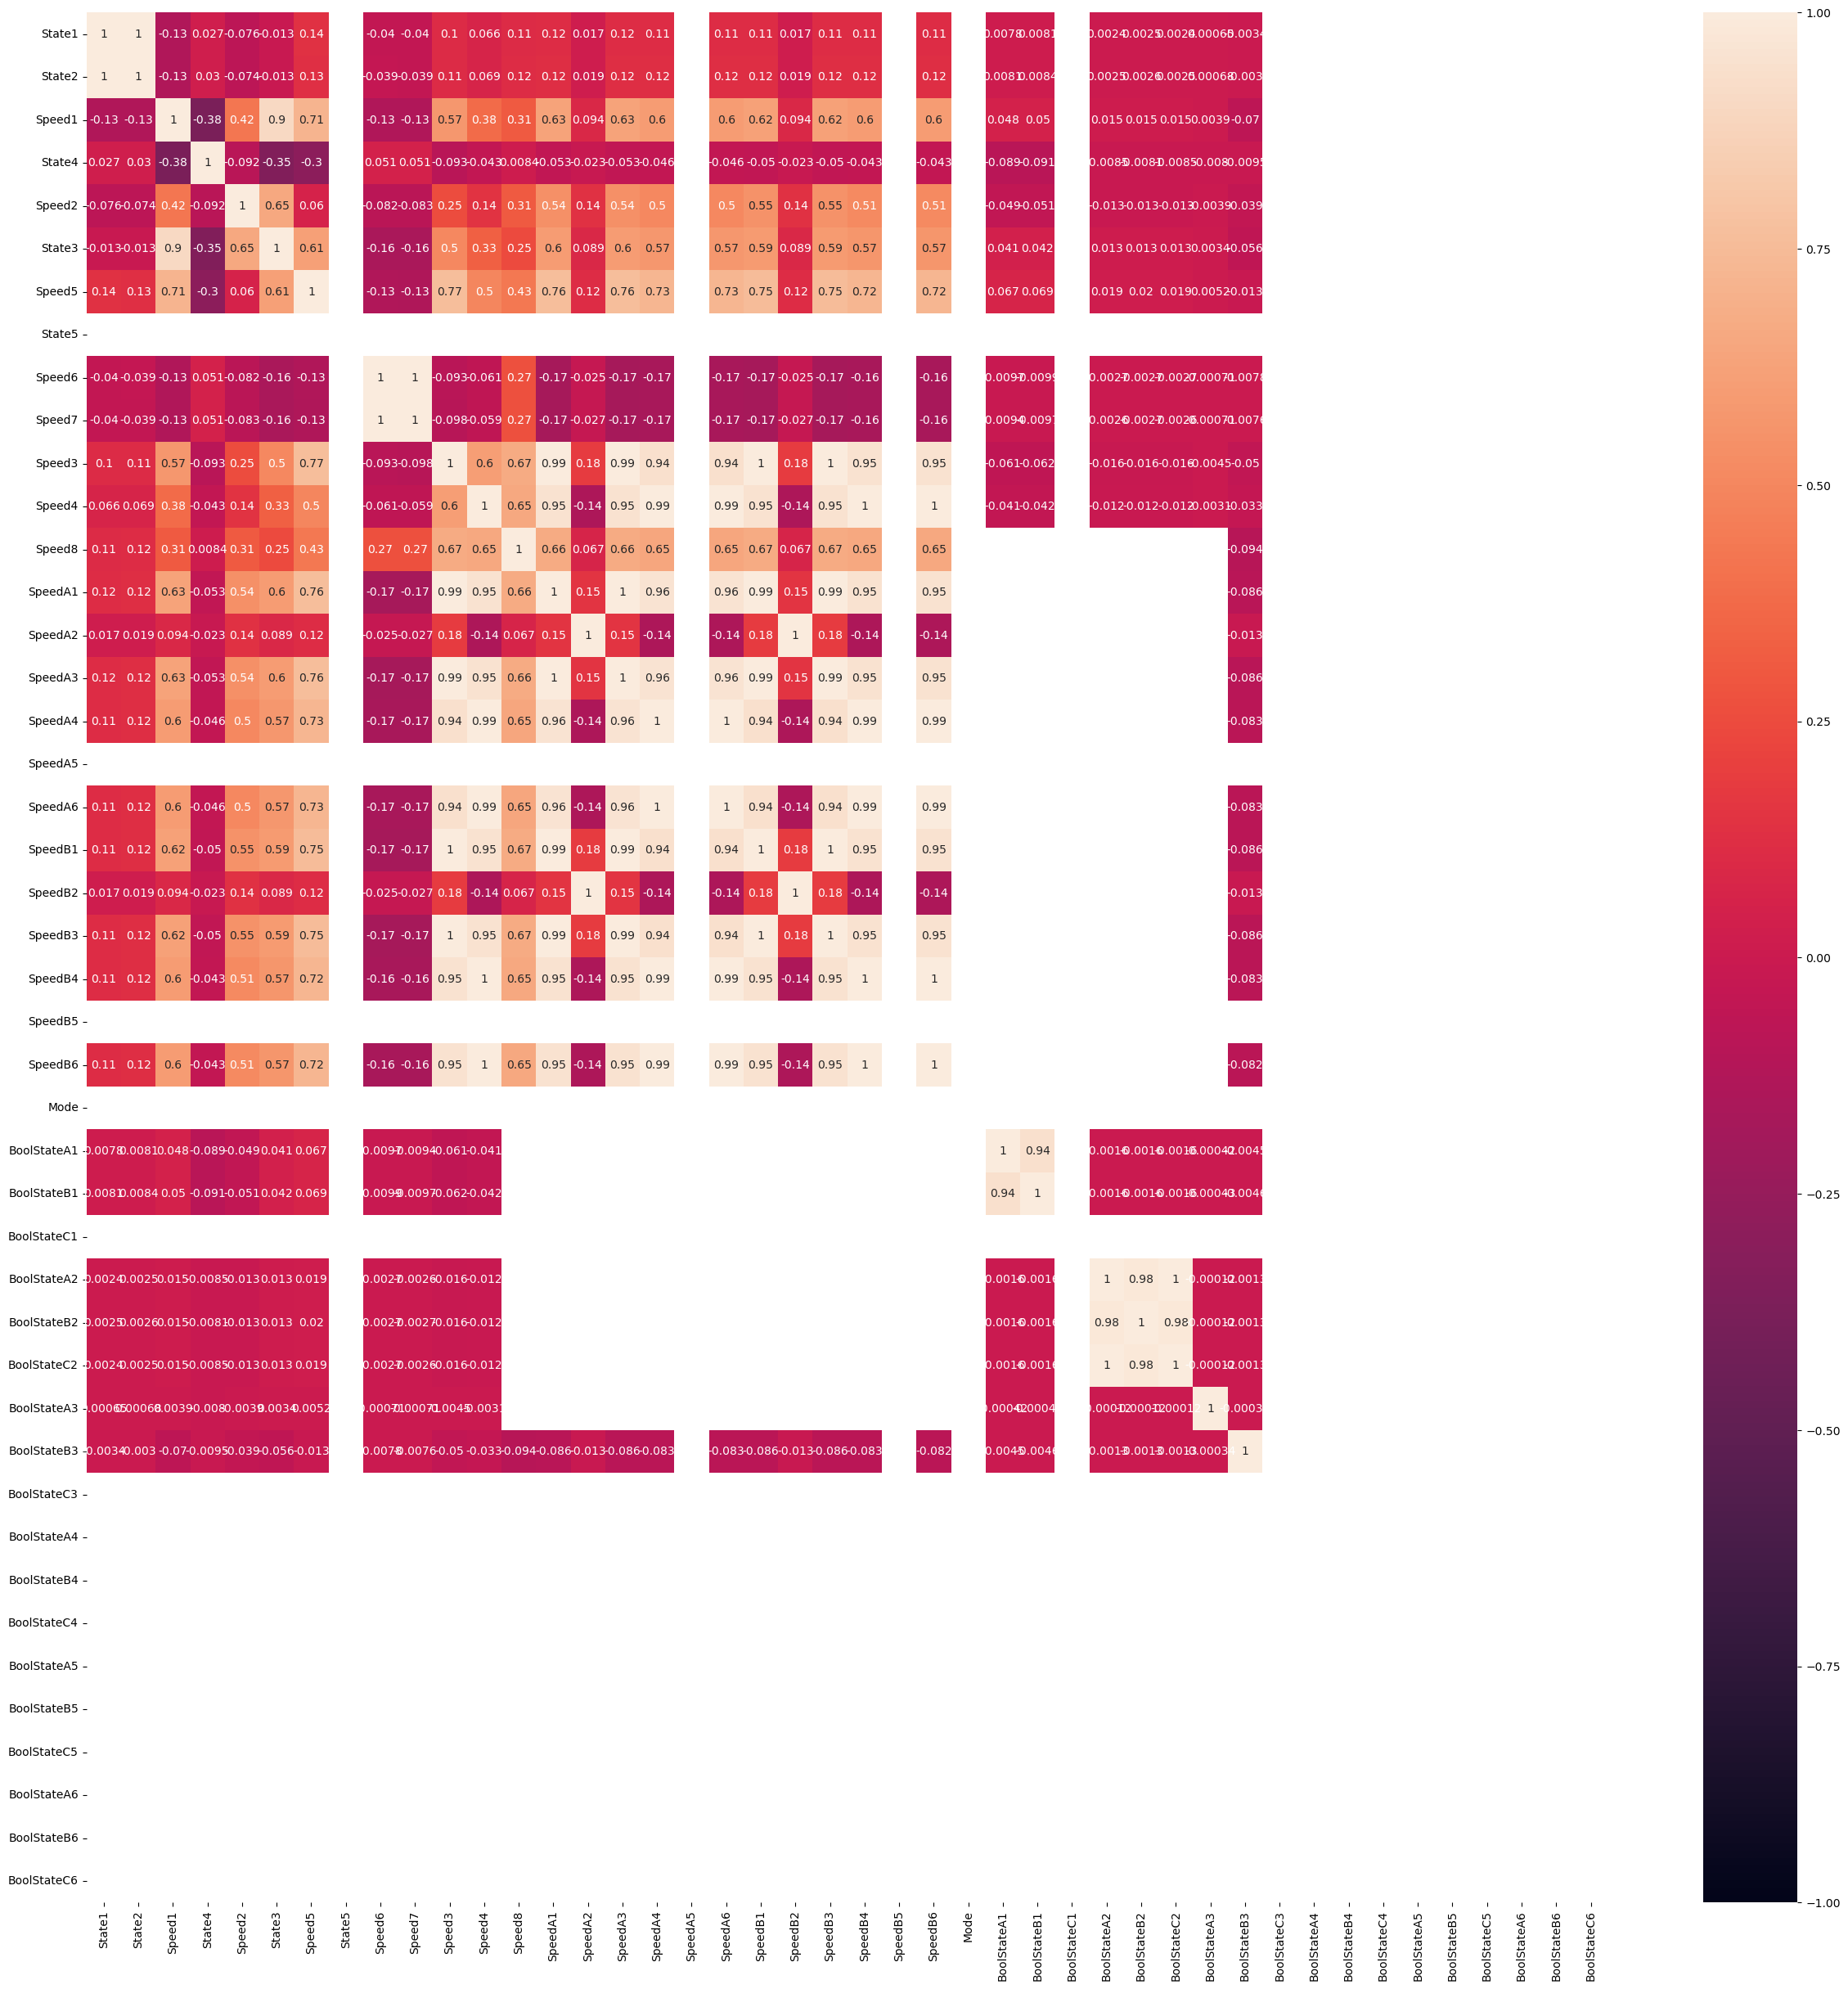

In [34]:
#Heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [19]:
# Replace missing values
# df['EngThrState'].fillna(value=0,inplace=True)
# df.isnull().sum()

## Clean Data

In [5]:
#Handle Missing values
#Replace missing values with previous values
#Replace top missing values with 0

df['State1'] = df['State1'].fillna(method='ffill')
df['State1'] = df['State1'].fillna(value=0)
df['State2'] = df['State2'].fillna(method='ffill')
df['State2'] = df['State2'].fillna(value=0)
df['Speed1'] = df['Speed1'].fillna(method='ffill')
df['Speed1'] = df['Speed1'].fillna(value=0)
df['State3'] = df['State3'].fillna(method='ffill')
df['State3'] = df['State3'].fillna(value=0)
df['Speed2'] = df['Speed2'].fillna(method='ffill')
df['Speed2'] = df['Speed2'].fillna(value=0)
df['State3'] = df['State3'].fillna(method='ffill')
df['State3'] = df['State3'].fillna(value=0)
df['Speed5'] = df['Speed5'].fillna(method='ffill')
df['Speed5'] = df['Speed5'].fillna(value=0)
df['State5'] = df['State5'].fillna(method='ffill')
df['State5'] = df['State5'].fillna(value=0)
df['Speed6'] = df['Speed6'].fillna(method='ffill')
df['Speed6'] = df['Speed6'].fillna(value=0)
df['Speed7'] = df['Speed7'].fillna(method='ffill')
df['Speed7'] = df['Speed7'].fillna(value=0)
df['Speed3'] = df['Speed3'].fillna(method='ffill')
df['Speed3'] = df['Speed3'].fillna(value=0)
df['Speed4'] = df['Speed4'].fillna(method='ffill')
df['Speed4'] = df['Speed4'].fillna(value=0)
df['Speed8'] = df['Speed8'].fillna(method='ffill')
df['Speed8'] = df['Speed8'].fillna(value=0)
df['Mode'] = df['Mode'].fillna(method='ffill')
df['Mode'] = df['Mode'].fillna(value=0)
df['SpeedA1'] = df['SpeedA1'].fillna(value=0)
df['SpeedA2'] = df['SpeedA2'].fillna(value=0)
df['SpeedA3'] = df['SpeedA3'].fillna(value=0)
df['SpeedA4'] = df['SpeedA4'].fillna(value=0)
df['SpeedA5'] = df['SpeedA5'].fillna(value=0)
df['SpeedA6'] = df['SpeedA6'].fillna(value=0)
df['SpeedB1'] = df['SpeedB1'].fillna(value=0)
df['SpeedB2'] = df['SpeedB2'].fillna(value=0)
df['SpeedB3'] = df['SpeedB3'].fillna(value=0)
df['SpeedB4'] = df['SpeedB4'].fillna(value=0)
df['SpeedB5'] = df['SpeedB5'].fillna(value=0)
df['SpeedB6'] = df['SpeedB6'].fillna(value=0)

df['BoolStateA1'] = df['BoolStateA1'].fillna(value=0)
df['BoolStateA2'] = df['BoolStateA2'].fillna(value=0)
df['BoolStateA3'] = df['BoolStateA3'].fillna(value=0)
df['BoolStateA4'] = df['BoolStateA4'].fillna(value=0)
df['BoolStateA5'] = df['BoolStateA5'].fillna(value=0)
df['BoolStateA6'] = df['BoolStateA6'].fillna(value=0)
df['BoolStateB1'] = df['BoolStateB1'].fillna(value=0)
df['BoolStateB2'] = df['BoolStateB2'].fillna(value=0)
df['BoolStateB3'] = df['BoolStateB3'].fillna(value=0)
df['BoolStateB4'] = df['BoolStateB4'].fillna(value=0)
df['BoolStateB5'] = df['BoolStateB5'].fillna(value=0)
df['BoolStateB6'] = df['BoolStateB6'].fillna(value=0)

# Changing datatype of plugging to int
df['BoolStateA1'] = df['BoolStateA1'].astype(int)
df['BoolStateA2'] = df['BoolStateA2'].astype(int)
df['BoolStateA3'] = df['BoolStateA3'].astype(int)
df['BoolStateA4'] = df['BoolStateA4'].astype(int)
df['BoolStateA5'] = df['BoolStateA5'].astype(int)
df['BoolStateA6'] = df['BoolStateA6'].astype(int)
df['BoolStateB1'] = df['BoolStateB1'].astype(int)
df['BoolStateB2'] = df['BoolStateB2'].astype(int)
df['BoolStateB3'] = df['BoolStateB3'].astype(int)
df['BoolStateB4'] = df['BoolStateB4'].astype(int)
df['BoolStateB5'] = df['BoolStateB5'].astype(int)
df['BoolStateB6'] = df['BoolStateB6'].astype(int)

#Combine BoolStateA & BoolStateB into one
df['BoolState1']=df['BoolStateA1'] | df['BoolStateB1']
df['BoolState2']=df['BoolStateA2'] | df['BoolStateB2']
df['BoolState3']=df['BoolStateA3'] | df['BoolStateB3']
df['BoolState4']=df['BoolStateA4'] | df['BoolStateB4']
df['BoolState5']=df['BoolStateA5'] | df['BoolStateB5']
df['BoolState6']=df['BoolStateA6'] | df['BoolStateB6']


In [84]:
has_na = df.isnull().values.any()
print(has_na)
if has_na:
    columns_with_na = df.columns[df.isnull().any()].tolist()
    print(f"Columns with missing values: {columns_with_na}")


True
Columns with missing values: ['BoolStateC1', 'BoolStateC2', 'BoolStateC3', 'BoolStateC4', 'BoolStateC5', 'BoolStateC6']


In [85]:
#prints unique values in the column and whether column contains any missing values
unique_values = df['BoolState1'].unique()
print(unique_values)
has_na = df['BoolState1'].isnull().values.any()
print(has_na)

[0 1]
False


In [86]:
df.columns

Index(['Time', 'State1', 'State2', 'Speed1', 'State4', 'Speed2', 'State3',
       'Speed5', 'State5', 'Speed6', 'Speed7', 'Speed3', 'Speed4', 'Speed8',
       'SpeedA1', 'SpeedA2', 'SpeedA3', 'SpeedA4', 'SpeedA5', 'SpeedA6',
       'SpeedB1', 'SpeedB2', 'SpeedB3', 'SpeedB4', 'SpeedB5', 'SpeedB6',
       'Mode', 'BoolStateA1', 'BoolStateB1', 'BoolStateC1', 'BoolStateA2',
       'BoolStateB2', 'BoolStateC2', 'BoolStateA3', 'BoolStateB3',
       'BoolStateC3', 'BoolStateA4', 'BoolStateB4', 'BoolStateC4',
       'BoolStateA5', 'BoolStateB5', 'BoolStateC5', 'BoolStateA6',
       'BoolStateB6', 'BoolStateC6', 'BoolState1', 'BoolState2', 'BoolState3',
       'BoolState4', 'BoolState5', 'BoolState6'],
      dtype='object')

## Validation Dataset

In [23]:
#Validation dataset
#Data set with plugged case, for testing trained model
df_test = pd.read_csv('C:/Users/hwa2zj7/OneDrive - Deere & Co/03_BITS/Dissertation/Dataset/ValidationDataSet/1N0C570PLN6220002_20221113_191339_CanDump_00_can.csv')

#Rename columns
df_test.rename(columns = {'Time (s)':'Time','OIC.HarvEngageCmds (BitQuadState)':'State1','OIC.HarvEngageCmds2 (BitQuadState)':'State2','ECU.EngineSpeed (rpm)':'Speed1','PTP.WheelBasedVehicleSpeed (kph)':'Speed2','0x5B.EngThrottleState (state)':'State3','JDL.HdrDriveSpeed (rpm)':'Speed3','JDL.ClnrDriveSpeed (rpm)':'Speed4','ECU.EngOpStateFromEcu (state)':'State4','0x5B.ProdFanSpd (rpm)':'Speed5','0x5B.ImplementWorkState (state)':'State5','JDL.LHDrumSpeed (rpm)':'Speed6','JDL.RHDrumSpeed (rpm)':'Speed7','JDL.HdrAvgSpd (rpm)':'Speed8','JDL.CA4_ValidatedMachMode (mode)':'Mode'}, inplace = True)
df_test.rename(columns = {'JDL.Unit1_Front_Drum_Speed (rpm)':'SpeedA1','JDL.Unit2_Front_Drum_Speed (rpm)':'SpeedA2','JDL.Unit3_Front_Drum_Speed (rpm)':'SpeedA3','JDL.Unit4_Front_Drum_Speed (rpm)':'SpeedA4','JDL.Unit5_Front_Drum_Speed (rpm)':'SpeedA5','JDL.Unit6_Front_Drum_Speed (rpm)':'SpeedA6'}, inplace = True)
df_test.rename(columns = {'JDL.Unit1_Rear_Drum_Speed (rpm)':'SpeedB1','JDL.Unit2_Rear_Drum_Speed (rpm)':'SpeedB2','JDL.Unit3_Rear_Drum_Speed (rpm)':'SpeedB3','JDL.Unit4_Rear_Drum_Speed (rpm)':'SpeedB4','JDL.Unit5_Rear_Drum_Speed (rpm)':'SpeedB5','JDL.Unit6_Rear_Drum_Speed (rpm)':'SpeedB6'}, inplace=True)
df_test.rename(columns = {'SV2.Unit1_Front_Plug (Bool)':'BoolStateA1','SV2.Unit1_Rear_Plug (Bool)':'BoolStateB1','SV2.Unit1_Doffer_Plug (Bool)':'BoolStateC1',
                     'SV2.Unit2_Front_Plug (Bool)':'BoolStateA2','SV2.Unit2_Rear_Plug (Bool)':'BoolStateB2','SV2.Unit2_Doffer_Plug (Bool)':'BoolStateC2',
                     'SV2.Unit3_Front_Plug (Bool)':'BoolStateA3','SV2.Unit3_Rear_Plug (Bool)':'BoolStateB3','SV2.Unit3_Doffer_Plug (Bool)':'BoolStateC3',
                     'SV2.Unit4_Front_Plug (Bool)':'BoolStateA4','SV2.Unit4_Rear_Plug (Bool)':'BoolStateB4','SV2.Unit4_Doffer_Plug (Bool)':'BoolStateC4',
                     'SV2.Unit5_Front_Plug (Bool)':'BoolStateA5','SV2.Unit5_Rear_Plug (Bool)':'BoolStateB5','SV2.Unit5_Doffer_Plug (Bool)':'BoolStateC5',
                     'SV2.Unit6_Front_Plug (Bool)':'BoolStateA6','SV2.Unit6_Rear_Plug (Bool)':'BoolStateB6','SV2.Unit6_Doffer_Plug (Bool)':'BoolStateC6'}, inplace=True)

In [24]:
#Handle Missing values
#Replace missing with previous values
#Replace top missing values with 0

df_test['State1'] = df_test['State1'].fillna(method='ffill')
df_test['State1'] = df_test['State1'].fillna(value=0)
df_test['State2'] = df_test['State2'].fillna(method='ffill')
df_test['State2'] = df_test['State2'].fillna(value=0)
df_test['Speed1'] = df_test['Speed1'].fillna(method='ffill')
df_test['Speed1'] = df_test['Speed1'].fillna(value=0)
df_test['State3'] = df_test['State3'].fillna(method='ffill')
df_test['State3'] = df_test['State3'].fillna(value=0)
df_test['Speed2'] = df_test['Speed2'].fillna(method='ffill')
df_test['Speed2'] = df_test['Speed2'].fillna(value=0)
df_test['State3'] = df_test['State3'].fillna(method='ffill')
df_test['State3'] = df_test['State3'].fillna(value=0)
df_test['Speed5'] = df_test['Speed5'].fillna(method='ffill')
df_test['Speed5'] = df_test['Speed5'].fillna(value=0)
df_test['State5'] = df_test['State5'].fillna(method='ffill')
df_test['State5'] = df_test['State5'].fillna(value=0)
df_test['Speed6'] = df_test['Speed6'].fillna(method='ffill')
df_test['Speed6'] = df_test['Speed6'].fillna(value=0)
df_test['Speed7'] = df_test['Speed7'].fillna(method='ffill')
df_test['Speed7'] = df_test['Speed7'].fillna(value=0)
df_test['Speed3'] = df_test['Speed3'].fillna(method='ffill')
df_test['Speed3'] = df_test['Speed3'].fillna(value=0)
df_test['Speed4'] = df_test['Speed4'].fillna(method='ffill')
df_test['Speed4'] = df_test['Speed4'].fillna(value=0)
df_test['Speed8'] = df_test['Speed8'].fillna(method='ffill')
df_test['Speed8'] = df_test['Speed8'].fillna(value=0)
df_test['Mode'] = df_test['Mode'].fillna(method='ffill')
df_test['Mode'] = df_test['Mode'].fillna(value=0)
df_test['SpeedA1'] = df_test['SpeedA1'].fillna(value=0)
df_test['SpeedA2'] = df_test['SpeedA2'].fillna(value=0)
df_test['SpeedA3'] = df_test['SpeedA3'].fillna(value=0)
df_test['SpeedA4'] = df_test['SpeedA4'].fillna(value=0)
df_test['SpeedA5'] = df_test['SpeedA5'].fillna(value=0)
df_test['SpeedA6'] = df_test['SpeedA6'].fillna(value=0)
df_test['SpeedB1'] = df_test['SpeedB1'].fillna(value=0)
df_test['SpeedB2'] = df_test['SpeedB2'].fillna(value=0)
df_test['SpeedB3'] = df_test['SpeedB3'].fillna(value=0)
df_test['SpeedB4'] = df_test['SpeedB4'].fillna(value=0)
df_test['SpeedB5'] = df_test['SpeedB5'].fillna(value=0)
df_test['SpeedB6'] = df_test['SpeedB6'].fillna(value=0)

df_test['BoolStateA1'] = df_test['BoolStateA1'].fillna(value=0)
df_test['BoolStateA2'] = df_test['BoolStateA2'].fillna(value=0)
df_test['BoolStateA3'] = df_test['BoolStateA3'].fillna(value=0)
df_test['BoolStateA4'] = df_test['BoolStateA4'].fillna(value=0)
df_test['BoolStateA5'] = df_test['BoolStateA5'].fillna(value=0)
df_test['BoolStateA6'] = df_test['BoolStateA6'].fillna(value=0)
df_test['BoolStateB1'] = df_test['BoolStateB1'].fillna(value=0)
df_test['BoolStateB2'] = df_test['BoolStateB2'].fillna(value=0)
df_test['BoolStateB3'] = df_test['BoolStateB3'].fillna(value=0)
df_test['BoolStateB4'] = df_test['BoolStateB4'].fillna(value=0)
df_test['BoolStateB5'] = df_test['BoolStateB5'].fillna(value=0)
df_test['BoolStateB6'] = df_test['BoolStateB6'].fillna(value=0)

# Changing datatype of plugging to int
df_test['BoolStateA1'] = df_test['BoolStateA1'].astype(int)
df_test['BoolStateA2'] = df_test['BoolStateA2'].astype(int)
df_test['BoolStateA3'] = df_test['BoolStateA3'].astype(int)
df_test['BoolStateA4'] = df_test['BoolStateA4'].astype(int)
df_test['BoolStateA5'] = df_test['BoolStateA5'].astype(int)
df_test['BoolStateA6'] = df_test['BoolStateA6'].astype(int)
df_test['BoolStateB1'] = df_test['BoolStateB1'].astype(int)
df_test['BoolStateB2'] = df_test['BoolStateB2'].astype(int)
df_test['BoolStateB3'] = df_test['BoolStateB3'].astype(int)
df_test['BoolStateB4'] = df_test['BoolStateB4'].astype(int)
df_test['BoolStateB5'] = df_test['BoolStateB5'].astype(int)
df_test['BoolStateB6'] = df_test['BoolStateB6'].astype(int)

#Combine BoolStateA & BoolStateB into one
df_test['BoolState1']=df_test['BoolStateA1'] | df_test['BoolStateB1']
df_test['BoolState2']=df_test['BoolStateA2'] | df_test['BoolStateB2']
df_test['BoolState3']=df_test['BoolStateA3'] | df_test['BoolStateB3']
df_test['BoolState4']=df_test['BoolStateA4'] | df_test['BoolStateB4']
df_test['BoolState5']=df_test['BoolStateA5'] | df_test['BoolStateB5']
df_test['BoolState6']=df_test['BoolStateA6'] | df_test['BoolStateB6']


## Random Forest Classifier WITH directly dependent AB Inputs

In [89]:
#Train model WITH Drum speed inputs
# Split the data into training and testing sets
X = df[['State1', 'State2', 'Speed1', 'State3',
       'Speed2', 'State4', 'Speed5',
       'State5', 'Speed6', 'Speed7', 'Speed3',
       'Speed4', 'Speed8', 'SpeedA1',
       'SpeedA2', 'SpeedA3',
       'SpeedA4', 'SpeedA5',
       'SpeedA6', 'SpeedB1',
       'SpeedB2', 'SpeedB3',
       'SpeedB4', 'SpeedB5',
       'SpeedB6', 'Mode']].values
y = df['BoolState1'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [90]:
# Train the random forest model WITH Speed AB inputs
rf_model_WITH_SpeedAB = RandomForestClassifier(n_estimators=50, max_depth=6)
rf_model_WITH_SpeedAB.fit(X_train, y_train)

#Save model
# save the RandomForestClassifier model as a pickle file
model_pkl_file_WITH_SpeedAB = "RrandomForestClassifier_model_WITH_SpeedABInputs.pkl"
with open(model_pkl_file_WITH_SpeedAB, 'wb') as file:  
    pickle.dump(rf_model_WITH_SpeedAB, file)

In [91]:
#Load model
model_pkl_file_WITH_SpeedAB = "RrandomForestClassifier_model_WITH_SpeedABInputs.pkl"
# load model from pickle file
with open(model_pkl_file_WITH_SpeedAB, 'rb') as file:  
    rf_model_WITH_SpeedAB = pickle.load(file)

In [92]:
# Validate the random forest model
y_pred = rf_model_WITH_SpeedAB.predict(X_test)

# calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
p, r, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Calculate the root mean squared error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

# print results
print(f"Accuracy: {accuracy}")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F1-score: {f1}")
#print(f"Root Mean Squared Error: {:.2f}".format(rmse))

# calculate precision, recall, and F1-score
#report = classification_report(y_test, y_pred)

#print(f"Classification report:\n{report}")

Accuracy: 0.9405607210433155
Precision: 0.9505580211576841
Recall: 0.9405607210433155
F1-score: 0.9438745580347141


In [93]:
#Untrained dataset
df_test_X = df_test[['State1', 'State2', 'Speed1', 'State3',
       'Speed2', 'State4', 'Speed5',
       'State5', 'Speed6', 'Speed7', 'Speed3',
       'Speed4', 'Speed8', 'SpeedA1',
       'SpeedA2', 'SpeedA3',
       'SpeedA4', 'SpeedA5',
       'SpeedA6', 'SpeedB1',
       'SpeedB2', 'SpeedB3',
       'SpeedB4', 'SpeedB5',
       'SpeedB6', 'Mode']].to_numpy()
df_test_Y = df_test['BoolState1']

In [94]:
#Validation with untrained dataset

# Validate the random forest model
y_test_pred = rf_model_WITH_SpeedAB.predict(df_test_X)

# calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(df_test_Y, y_test_pred)
p, r, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Calculate the root mean squared error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

# print results
print(f"Accuracy: {accuracy}")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F1-score: {f1}")
#print(f"Root Mean Squared Error: {:.2f}".format(rmse))

# calculate precision, recall, and F1-score
#report = classification_report(y_test, y_pred)

#print(f"Classification report:\n{report}")

Accuracy: 0.7539920529801325
Precision: 0.9505580211576841
Recall: 0.9405607210433155
F1-score: 0.9438745580347141


In [95]:
#Export to excel
# create a pandas dataframe from the NumPy arrays
df_xls = pd.DataFrame({'Array1': df_test_Y,
                   'Array2': y_test_pred})

# create a pandas Excel writer object
writer = pd.ExcelWriter('output.xlsx', engine='xlsxwriter')

# write the dataframe to the Excel file
df_xls.to_excel(writer, sheet_name='Sheet1')

# save the Excel file
writer.save()


C:\Users\hwa2zj7\AppData\Local\Temp\ipykernel_21916\1601603462.py:13: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


## Random Forest Classifier WITHOUT directly dependent AB Inputs

In [96]:
#Train model WITHOUT speed AB inputs
# Split the data into training and testing sets
X = df[['State1', 'State2', 'Speed1', 'State3',
       'Speed2', 'State4', 'Speed5',
       'State5', 'Speed6', 'Speed7', 'Speed3',
       'Speed4', 'Speed8', 'Mode']].values
y = df['BoolState1'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [97]:
# Train the random forest model
rf_model_WITHOUT_SpeedAB = RandomForestClassifier(n_estimators=100, max_depth=6)
rf_model_WITHOUT_SpeedAB.fit(X_train, y_train)

#Save model
# save the RandomForestClassifier model as a pickle file
model_pkl_file_WITHOUT_SpeedAB = "RrandomForestClassifier_model_WITHOUT_SpeedAB.pkl"
with open(model_pkl_file_WITHOUT_SpeedAB, 'wb') as file:  
    pickle.dump(rf_model_WITHOUT_SpeedAB, file)

In [98]:
#Load model
model_pkl_file_WITHOUT_SpeedAB = "RrandomForestClassifier_model_WITHOUT_SpeedAB.pkl"
# load model from pickle file
with open(model_pkl_file_WITHOUT_SpeedAB, 'rb') as file:  
    rf_model_WITHOUT_SpeedAB = pickle.load(file)

In [99]:
# Validate the random forest model
y_pred = rf_model_WITHOUT_SpeedAB.predict(X_test)

# calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
p, r, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# print results
print(f"Accuracy: {accuracy}")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F1-score: {f1}")

# Calculate the root mean squared error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print("Root Mean Squared Error: {:.2f}".format(rmse))

# calculate precision, recall, and F1-score
#report = classification_report(y_test, y_pred)
#print(f"Classification report:\n{report}")

Accuracy: 0.9416085125429798
Precision: 0.951643755424018
Recall: 0.9416085125429798
F1-score: 0.9449074025313615
Root Mean Squared Error: 0.24


In [100]:
df_test_X = df_test[['State1', 'State2', 'Speed1', 'State3',
       'Speed2', 'State4', 'Speed5',
       'State5', 'Speed6', 'Speed7', 'Speed3',
       'Speed4', 'Speed8', 'Mode']].to_numpy()
df_test_Y = df_test['BoolState1']

In [101]:
#Validation with untrained dataset

# Validate the random forest model
y_test_pred = rf_model_WITHOUT_SpeedAB.predict(df_test_X)

# calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(df_test_Y, y_test_pred)
p, r, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Calculate the root mean squared error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

# print results
print(f"Accuracy: {accuracy}")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F1-score: {f1}")


Accuracy: 0.7500079470198675
Precision: 0.951643755424018
Recall: 0.9416085125429798
F1-score: 0.9449074025313615


## LSTM Classifier WITH directly dependent AB Inputs

In [18]:
df1 = df

#Rename columns
df.rename(columns = {'Time (s)':'Time','OIC.HarvEngageCmds (BitQuadState)':'State1','OIC.HarvEngageCmds2 (BitQuadState)':'State2','ECU.EngineSpeed (rpm)':'Speed1','PTP.WheelBasedVehicleSpeed (kph)':'Speed2','0x5B.EngThrottleState (state)':'State3','JDL.HdrDriveSpeed (rpm)':'Speed3','JDL.ClnrDriveSpeed (rpm)':'Speed4','ECU.EngOpStateFromEcu (state)':'State4','0x5B.ProdFanSpd (rpm)':'Speed5','0x5B.ImplementWorkState (state)':'State5','JDL.LHDrumSpeed (rpm)':'Speed6','JDL.RHDrumSpeed (rpm)':'Speed7','JDL.HdrAvgSpd (rpm)':'Speed8','JDL.CA4_ValidatedMachMode (mode)':'Mode'}, inplace = True)
df.rename(columns = {'JDL.Unit1_Front_Drum_Speed (rpm)':'SpeedA1','JDL.Unit2_Front_Drum_Speed (rpm)':'SpeedA2','JDL.Unit3_Front_Drum_Speed (rpm)':'SpeedA3','JDL.Unit4_Front_Drum_Speed (rpm)':'SpeedA4','JDL.Unit5_Front_Drum_Speed (rpm)':'SpeedA5','JDL.Unit6_Front_Drum_Speed (rpm)':'SpeedA6'}, inplace = True)
df.rename(columns = {'JDL.Unit1_Rear_Drum_Speed (rpm)':'SpeedB1','JDL.Unit2_Rear_Drum_Speed (rpm)':'SpeedB2','JDL.Unit3_Rear_Drum_Speed (rpm)':'SpeedB3','JDL.Unit4_Rear_Drum_Speed (rpm)':'SpeedB4','JDL.Unit5_Rear_Drum_Speed (rpm)':'SpeedB5','JDL.Unit6_Rear_Drum_Speed (rpm)':'SpeedB6'}, inplace=True)
df.rename(columns = {'SV2.Unit1_Front_Plug (Bool)':'BoolStateA1','SV2.Unit1_Rear_Plug (Bool)':'BoolStateB1','SV2.Unit1_Doffer_Plug (Bool)':'BoolStateC1',
                     'SV2.Unit2_Front_Plug (Bool)':'BoolStateA2','SV2.Unit2_Rear_Plug (Bool)':'BoolStateB2','SV2.Unit2_Doffer_Plug (Bool)':'BoolStateC2',
                     'SV2.Unit3_Front_Plug (Bool)':'BoolStateA3','SV2.Unit3_Rear_Plug (Bool)':'BoolStateB3','SV2.Unit3_Doffer_Plug (Bool)':'BoolStateC3',
                     'SV2.Unit4_Front_Plug (Bool)':'BoolStateA4','SV2.Unit4_Rear_Plug (Bool)':'BoolStateB4','SV2.Unit4_Doffer_Plug (Bool)':'BoolStateC4',
                     'SV2.Unit5_Front_Plug (Bool)':'BoolStateA5','SV2.Unit5_Rear_Plug (Bool)':'BoolStateB5','SV2.Unit5_Doffer_Plug (Bool)':'BoolStateC5',
                     'SV2.Unit6_Front_Plug (Bool)':'BoolStateA6','SV2.Unit6_Rear_Plug (Bool)':'BoolStateB6','SV2.Unit6_Doffer_Plug (Bool)':'BoolStateC6'}, inplace=True)

In [19]:
df1.columns

Index(['Time', 'State1', 'State2', 'Speed1', 'State4', 'Speed2', 'State3',
       'Speed5', 'State5', 'Speed6', 'Speed7', 'Speed3', 'Speed4', 'Speed8',
       'SpeedA1', 'SpeedA2', 'SpeedA3', 'SpeedA4', 'SpeedA5', 'SpeedA6',
       'SpeedB1', 'SpeedB2', 'SpeedB3', 'SpeedB4', 'SpeedB5', 'SpeedB6',
       'Mode', 'BoolStateA1', 'BoolStateB1', 'BoolStateC1', 'BoolStateA2',
       'BoolStateB2', 'BoolStateC2', 'BoolStateA3', 'BoolStateB3',
       'BoolStateC3', 'BoolStateA4', 'BoolStateB4', 'BoolStateC4',
       'BoolStateA5', 'BoolStateB5', 'BoolStateC5', 'BoolStateA6',
       'BoolStateB6', 'BoolStateC6', 'BoolState1', 'BoolState2', 'BoolState3',
       'BoolState4', 'BoolState5', 'BoolState6'],
      dtype='object')

#### Clean df1

In [20]:
#Handle Missing values
#Replace missing with previous values
#Replace top missing values with 0

df1['State1'] = df1['State1'].fillna(method='ffill')
df1['State1'] = df1['State1'].fillna(value=0)
df1['State2'] = df1['State2'].fillna(method='ffill')
df1['State2'] = df1['State2'].fillna(value=0)
df1['Speed1'] = df1['Speed1'].fillna(method='ffill')
df1['Speed1'] = df1['Speed1'].fillna(value=0)
df1['State3'] = df1['State3'].fillna(method='ffill')
df1['State3'] = df1['State3'].fillna(value=0)
df1['Speed2'] = df1['Speed2'].fillna(method='ffill')
df1['Speed2'] = df1['Speed2'].fillna(value=0)
df1['State3'] = df1['State3'].fillna(method='ffill')
df1['State3'] = df1['State3'].fillna(value=0)
df1['Speed5'] = df1['Speed5'].fillna(method='ffill')
df1['Speed5'] = df1['Speed5'].fillna(value=0)
df1['State5'] = df1['State5'].fillna(method='ffill')
df1['State5'] = df1['State5'].fillna(value=0)
df1['Speed6'] = df1['Speed6'].fillna(method='ffill')
df1['Speed6'] = df1['Speed6'].fillna(value=0)
df1['Speed7'] = df1['Speed7'].fillna(method='ffill')
df1['Speed7'] = df1['Speed7'].fillna(value=0)
df1['Speed3'] = df1['Speed3'].fillna(method='ffill')
df1['Speed3'] = df1['Speed3'].fillna(value=0)
df1['Speed4'] = df1['Speed4'].fillna(method='ffill')
df1['Speed4'] = df1['Speed4'].fillna(value=0)
df1['Speed8'] = df1['Speed8'].fillna(method='ffill')
df1['Speed8'] = df1['Speed8'].fillna(value=0)
df1['Mode'] = df1['Mode'].fillna(method='ffill')
df1['Mode'] = df1['Mode'].fillna(value=0)
df1['SpeedA1'] = df1['SpeedA1'].fillna(value=0)
df1['SpeedA2'] = df1['SpeedA2'].fillna(value=0)
df1['SpeedA3'] = df1['SpeedA3'].fillna(value=0)
df1['SpeedA4'] = df1['SpeedA4'].fillna(value=0)
df1['SpeedA5'] = df1['SpeedA5'].fillna(value=0)
df1['SpeedA6'] = df1['SpeedA6'].fillna(value=0)
df1['SpeedB1'] = df1['SpeedB1'].fillna(value=0)
df1['SpeedB2'] = df1['SpeedB2'].fillna(value=0)
df1['SpeedB3'] = df1['SpeedB3'].fillna(value=0)
df1['SpeedB4'] = df1['SpeedB4'].fillna(value=0)
df1['SpeedB5'] = df1['SpeedB5'].fillna(value=0)
df1['SpeedB6'] = df1['SpeedB6'].fillna(value=0)

df1['BoolStateA1'] = df1['BoolStateA1'].fillna(value=0)
df1['BoolStateA2'] = df1['BoolStateA2'].fillna(value=0)
df1['BoolStateA3'] = df1['BoolStateA3'].fillna(value=0)
df1['BoolStateA4'] = df1['BoolStateA4'].fillna(value=0)
df1['BoolStateA5'] = df1['BoolStateA5'].fillna(value=0)
df1['BoolStateA6'] = df1['BoolStateA6'].fillna(value=0)
df1['BoolStateB1'] = df1['BoolStateB1'].fillna(value=0)
df1['BoolStateB2'] = df1['BoolStateB2'].fillna(value=0)
df1['BoolStateB3'] = df1['BoolStateB3'].fillna(value=0)
df1['BoolStateB4'] = df1['BoolStateB4'].fillna(value=0)
df1['BoolStateB5'] = df1['BoolStateB5'].fillna(value=0)
df1['BoolStateB6'] = df1['BoolStateB6'].fillna(value=0)

# Changing datatype of plugging to int
df1['BoolStateA1'] = df1['BoolStateA1'].astype(int)
df1['BoolStateA2'] = df1['BoolStateA2'].astype(int)
df1['BoolStateA3'] = df1['BoolStateA3'].astype(int)
df1['BoolStateA4'] = df1['BoolStateA4'].astype(int)
df1['BoolStateA5'] = df1['BoolStateA5'].astype(int)
df1['BoolStateA6'] = df1['BoolStateA6'].astype(int)
df1['BoolStateB1'] = df1['BoolStateB1'].astype(int)
df1['BoolStateB2'] = df1['BoolStateB2'].astype(int)
df1['BoolStateB3'] = df1['BoolStateB3'].astype(int)
df1['BoolStateB4'] = df1['BoolStateB4'].astype(int)
df1['BoolStateB5'] = df1['BoolStateB5'].astype(int)
df1['BoolStateB6'] = df1['BoolStateB6'].astype(int)

#Combine Front & Rear drum blockage into one
df1['BoolState1']=df1['BoolStateA1'] | df1['BoolStateB1']
df1['BoolState2']=df1['BoolStateA2'] | df1['BoolStateB2']
df1['BoolState3']=df1['BoolStateA3'] | df1['BoolStateB3']
df1['BoolState4']=df1['BoolStateA4'] | df1['BoolStateB4']
df1['BoolState5']=df1['BoolStateA5'] | df1['BoolStateB5']
df1['BoolState6']=df1['BoolStateA6'] | df1['BoolStateB6']


In [63]:
#Train model WITH AB speed inputs
# Split the data into training and testing sets
X_lstm_w = df1[['State1', 'State2', 'Speed1', 'State3',
       'Speed2', 'State4', 'Speed5',
       'State5', 'Speed6', 'Speed7', 'Speed3',
       'Speed4', 'Speed8', 'SpeedA1',
       'SpeedA2', 'SpeedA3',
       'SpeedA4', 'SpeedA5',
       'SpeedA6', 'SpeedB1',
       'SpeedB2', 'SpeedB3',
       'SpeedB4', 'SpeedB5',
       'SpeedB6', 'Mode']].values
y_lstm_w = df1['BoolState1'].values

#Scale input data between 0 and 1
#scalar = MinMaxScaler()
#scaledData = scalar.fit_transform(X_lstm_w)

#features = scaledData
#target = y_lstm_w

# Split the data into training and testing sets
X_train_lstm_w, X_test_lstm_w, y_train_lstm_w, y_test_lstm_w = train_test_split(X_lstm_w, y_lstm_w, test_size=0.2, shuffle=False)


In [12]:
#Data Reshaping for LSTM
print(np.shape(X_train_lstm_w))
print(np.shape(y_train_lstm_w))
print(np.shape(X_test_lstm_w))
print(np.shape(y_test_lstm_w))

#X_train_lstm_w = np.reshape(X_train_lstm_w, (-1, 26, 1))
#X_test_lstm_w = np.reshape(X_test_lstm_w, (-1, 26, 1))

#y_train_lstm_w = np.reshape(y_train_lstm_w, (-1, 1, 1))
#y_test_lstm_w = np.reshape(y_test_lstm_w, (-1, 1, 1))

print(np.shape(X_train_lstm_w))
print(np.shape(y_train_lstm_w))
print(np.shape(X_test_lstm_w))
print(np.shape(y_test_lstm_w))

(393208, 26)
(393208,)
(98302, 26)
(98302,)
(393208, 26, 1)
(393208, 1, 1)
(98302, 26, 1)
(98302, 1, 1)


In [64]:
#Time series generation

win_length = 100
batch_size = 32
num_features = 26

#Scale input data between 0 and 1
scalar = MinMaxScaler()
X_train_scaled = scalar.fit_transform(X_train_lstm_w)
X_test_scaled = scalar.fit_transform(X_test_lstm_w)

#TimeseriesGenerator(features, target, length=500, sampling_rate=1, batch_size=32)

train_generator = TimeseriesGenerator(X_train_scaled, y_train_lstm_w, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(X_test_scaled, y_test_lstm_w, length=win_length, sampling_rate=1, batch_size=batch_size)


In [16]:
#LSTM - Softmax activation:

# Define the LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(win_length, num_features)))
model.add(Dense(1, activation='softmax'))
print(model.summary())

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

X_train_lstm_w, X_test_lstm_w, y_train_lstm_w, y_test_lstm_w
# Train the model
model.fit(train_generator, epochs=5, batch_size=32, validation_data=test_generator)

#Save model
# save the LSTM  model as a pickle file
model.save('LSTM_model_With_ABInputs_softmax.keras')
# del model  # deletes the existing model

# returns a compiled model identical to the previous one
model_lstm_softmax = load_model('LSTM_model_With_ABInputs_softmax.keras')


Epoch 1/2
12285/12285 [==============================] - 240s 19ms/step - loss: 0.1702 - accuracy: 0.1338 - val_loss: 0.1498 - val_accuracy: 0.0000e+00
Epoch 2/2
12285/12285 [==============================] - 243s 20ms/step - loss: 0.1530 - accuracy: 0.1338 - val_loss: 0.1635 - val_accuracy: 0.0000e+00


In [65]:
#LSTM - Sigmoid activation:

# Define the LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(win_length, num_features)))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

X_train_lstm_w, X_test_lstm_w, y_train_lstm_w, y_test_lstm_w
# Train the model
model.fit(train_generator, epochs=2, batch_size=32, validation_data=test_generator)

#Save model
# save the LSTM  model as a pickle file
model.save('LSTM_model_With_ABInputs_sigmoid.keras')
# del model  # deletes the existing model



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 32)                7552      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7585 (29.63 KB)
Trainable params: 7585 (29.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/2
12285/12285 [==============================] - 305s 25ms/step - loss: 0.1683 - accuracy: 0.9189 - val_loss: 0.1628 - val_accuracy: 0.8812
Epoch 2/2
12285/12285 [==============================] - 358s 29ms/step - loss: 0.1529 - accuracy: 0.9242 - val_loss: 0.3823 - val_accuracy: 0.7644


In [68]:
#load LSTM trained model with Softmax activation, with AB inputs
model_lstm_withABinputs = load_model('LSTM_model_With_ABInputs_softmax.keras')


In [31]:
#load LSTM trained model with Sigmoid activation, with AB inputs
model_lstm_withABinputs = load_model('LSTM_model_With_ABInputs_sigmoid.keras')


In [32]:
#validation using untrained dataset
df_test_X = df_test[['State1', 'State2', 'Speed1', 'State3',
       'Speed2', 'State4', 'Speed5',
       'State5', 'Speed6', 'Speed7', 'Speed3',
       'Speed4', 'Speed8', 'SpeedA1',
       'SpeedA2', 'SpeedA3',
       'SpeedA4', 'SpeedA5',
       'SpeedA6', 'SpeedB1',
       'SpeedB2', 'SpeedB3',
       'SpeedB4', 'SpeedB5',
       'SpeedB6', 'Mode']].values
df_test_Y = df_test['BoolState1'].values

#Scale input data between 0 and 1
scalar = MinMaxScaler()
scaledData = scalar.fit_transform(df_test_X)

features = scaledData
target = df_test_Y

test_generator = TimeseriesGenerator(features, target, length=win_length, sampling_rate=1, batch_size=batch_size)

# Validate model
loss, accuracy = model_lstm_withABinputs.evaluate(test_generator)
df_pred_Y = model_lstm_withABinputs.predict(test_generator)

df_print_yPred = pd.DataFrame(df_pred_Y,columns=['yPredicted'])
df_print_yPred.to_excel('lstm_withABinputs_yPred.xlsx', engine='openpyxl', index=False)
df_print_yActual = pd.DataFrame(df_test_Y,columns=['yActual'])
df_print_yActual.to_excel('lstm_withABinputs_yActual.xlsx', engine='openpyxl', index=False)


2947/2947 [==============================] - 17s 6ms/step


## LSTM Classifier WITHOUT directly dependent AB Inputs

In [10]:
num_time_steps = 10 
num_features = 14    

#X_train_lstm_w = np.reshape(X_train_lstm_w, (-1, num_time_steps, num_features))
#X_test_lstm_w = np.reshape(X_test_lstm_w, (-1, num_time_steps, num_features))

#Train model WITHOUT speed AB inputs
# Split the data into training and testing sets
X_lstm_w = df1[['State1', 'State2', 'Speed1', 'State3',
       'Speed2', 'State4', 'Speed5',
       'State5', 'Speed6', 'Speed7', 'Speed3',
       'Speed4', 'Speed8', 'Mode']].values
y_lstm_w = df1['BoolState1'].values

X_train_lstm_w, X_test_lstm_w, y_train_lstm_w, y_test_lstm_w = train_test_split(X_lstm_w, y_lstm_w, test_size=0.3)

In [ ]:
#Shape of inputs
print(np.shape(X_train_lstm_w))
print(np.shape(y_train_lstm_w))
print(np.shape(X_test_lstm_w))
print(np.shape(y_test_lstm_w))

#X_train_lstm_w = np.reshape(X_train_lstm_w, (-1, 14, 1))
#X_test_lstm_w = np.reshape(X_test_lstm_w, (-1, 14, 1))

#y_test_lstm_w = np.reshape(y_test_lstm_w, (-1, 1, 1))

print(np.shape(X_train_lstm_w))
print(np.shape(X_test_lstm_w))

In [11]:
#Time series generation

win_length = 100
batch_size = 32
num_features = 14

#Scale input data between 0 and 1
scalar = MinMaxScaler()
X_train_scaled = scalar.fit_transform(X_train_lstm_w)
X_test_scaled = scalar.fit_transform(X_test_lstm_w)

#TimeseriesGenerator(features, target, length=500, sampling_rate=1, batch_size=32)

train_generator = TimeseriesGenerator(X_train_scaled, y_train_lstm_w, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(X_test_scaled, y_test_lstm_w, length=win_length, sampling_rate=1, batch_size=batch_size)


In [14]:
#LSTM activation=Softmax without AB inputs

# Define the LSTM model
lstm_model_WITHOUT_ABInputs = Sequential()
lstm_model_WITHOUT_ABInputs.add(LSTM(32, input_shape=(win_length, num_features)))
lstm_model_WITHOUT_ABInputs.add(Dense(1, activation='softmax'))

# Compile the model
lstm_model_WITHOUT_ABInputs.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm_model_WITHOUT_ABInputs.fit(train_generator, epochs=2, batch_size=32, validation_data=test_generator)

lstm_model_WITHOUT_ABInputs.save('lstm_without_ABinputs_softmax.keras')



Epoch 1/2
10749/10749 [==============================] - 176s 16ms/step - loss: 0.3406 - accuracy: 0.1069 - val_loss: 0.3423 - val_accuracy: 0.1075
Epoch 2/2
10749/10749 [==============================] - 171s 16ms/step - loss: 0.3401 - accuracy: 0.1069 - val_loss: 0.3414 - val_accuracy: 0.1075


In [26]:
#LSTM activation=Sigmoid without AB inputs

# Define the LSTM model
lstm_model_WITHOUT_ABInputs = Sequential()
lstm_model_WITHOUT_ABInputs.add(LSTM(32, input_shape=(win_length, num_features)))
lstm_model_WITHOUT_ABInputs.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model_WITHOUT_ABInputs.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm_model_WITHOUT_ABInputs.fit(train_generator, epochs=2, batch_size=32, validation_data=test_generator)

lstm_model_WITHOUT_ABInputs.save('lstm_without_ABinputs_sigmoid.keras')



Epoch 1/2
10749/10749 [==============================] - 178s 16ms/step - loss: 0.3406 - accuracy: 0.8931 - val_loss: 0.1307 - val_accuracy: 0.9956
Epoch 2/2
10749/10749 [==============================] - 178s 17ms/step - loss: 0.3402 - accuracy: 0.8931 - val_loss: 0.1193 - val_accuracy: 0.9956


In [29]:
#load LSTM trained model with Softmax activation, without AB inputs
lstm_model_WITHOUT_ABInputs = load_model('lstm_without_ABinputs_softmax.keras')


In [27]:
#load LSTM trained model with Sigmoid activation, without AB inputs
lstm_model_WITHOUT_ABInputs = load_model('lstm_without_ABinputs_sigmoid.keras')


In [22]:
df_test.columns

Index(['Time', 'State1', 'State2', 'Speed1', 'State4', 'Speed2', 'State3',
       'Speed5', 'State5', 'Speed6', 'Speed7', 'Speed3', 'Speed4', 'Speed8',
       'SpeedA1', 'SpeedA2', 'SpeedA3', 'SpeedA4', 'SpeedA5', 'SpeedA6',
       'SpeedB1', 'SpeedB2', 'SpeedB3', 'SpeedB4', 'SpeedB5', 'SpeedB6',
       'Mode', 'BoolStateA1', 'BoolStateB1', 'BoolStateC1', 'BoolStateA2',
       'BoolStateB2', 'BoolStateC2', 'BoolStateA3', 'BoolStateB3',
       'BoolStateC3', 'BoolStateA4', 'BoolStateB4', 'BoolStateC4',
       'BoolStateA5', 'BoolStateB5', 'BoolStateC5', 'BoolStateA6',
       'BoolStateB6', 'BoolStateC6'],
      dtype='object')

In [30]:
#validation using untrained dataset

df_test_X = df_test[['State1', 'State2', 'Speed1', 'State3',
       'Speed2', 'State4', 'Speed5',
       'State5', 'Speed6', 'Speed7', 'Speed3',
       'Speed4', 'Speed8', 'Mode']].values
df_test_Y = df_test['BoolState1'].values

#Shape of inputs
print(np.shape(df_test_X))
print(np.shape(df_test_Y))

#Scale input data between 0 and 1
scalar = MinMaxScaler()
scaledData = scalar.fit_transform(df_test_X)

features = scaledData
target = df_test_Y

test_generator = TimeseriesGenerator(features, target, length=win_length, sampling_rate=1, batch_size=batch_size)

# Validate model
loss, accuracy = lstm_model_WITHOUT_ABInputs.evaluate(test_generator)
df_pred_Y = lstm_model_WITHOUT_ABInputs.predict(test_generator)

df_print_yPred = pd.DataFrame(df_pred_Y,columns=['yPredicted'])
df_print_yPred.to_excel('lstm_withoutAB_yPred.xlsx', engine='openpyxl', index=False)
df_print_yTest = pd.DataFrame(df_test_Y,columns=['yActual'])
df_print_yTest.to_excel('lstm_withoutAB_yActual.xlsx', engine='openpyxl', index=False)

(94375, 14)
(94375,)
2947/2947 [==============================] - 16s 5ms/step
